<a href="https://www.kaggle.com/code/kusumakar/customer-churn-eda-and-predictions?scriptVersionId=200453829" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/Telco_customer_churn.xlsx


In [2]:
df=pd.read_excel("/kaggle/input/telco-customer-churn/Telco_customer_churn.xlsx")

In [3]:
df.shape

(7043, 33)

In [4]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [5]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [6]:
df.drop(columns=['CustomerID','Churn Reason','Zip Code','Lat Long','Latitude','Longitude'],inplace=True)

In [7]:
df.columns

Index(['Count', 'Country', 'State', 'City', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV'],
      dtype='object')

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df1=df.groupby("Churn Value").agg({"Count":sum}).reset_index()

/tmp/ipykernel_16/2900352099.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df1=df.groupby("Churn Value").agg({"Count":sum}).reset_index()


In [10]:
df1

,Churn Value,Count
0,0,5174
1,1,1869


In [11]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()


In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(df.drop(["Churn Value"],axis=1),df['Churn Value'],test_size=0.25)

<Axes: xlabel='Churn Value', ylabel='Count'>

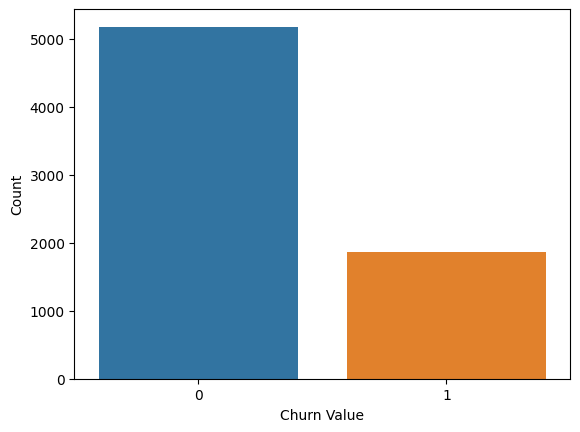

In [13]:
sns.barplot(x='Churn Value',y='Count',data=df1  )

In [14]:
df.columns

Index(['Count', 'Country', 'State', 'City', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV'],
      dtype='object')

/tmp/ipykernel_16/4081408355.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df2= df.groupby(["Country","State","City","Churn Value"]).agg({"Count":sum}).reset_index().sort_values(by='Count',ascending=True)


Text(0.5, 1.0, 'CITY VS OVERALL CHURN COUNTS')

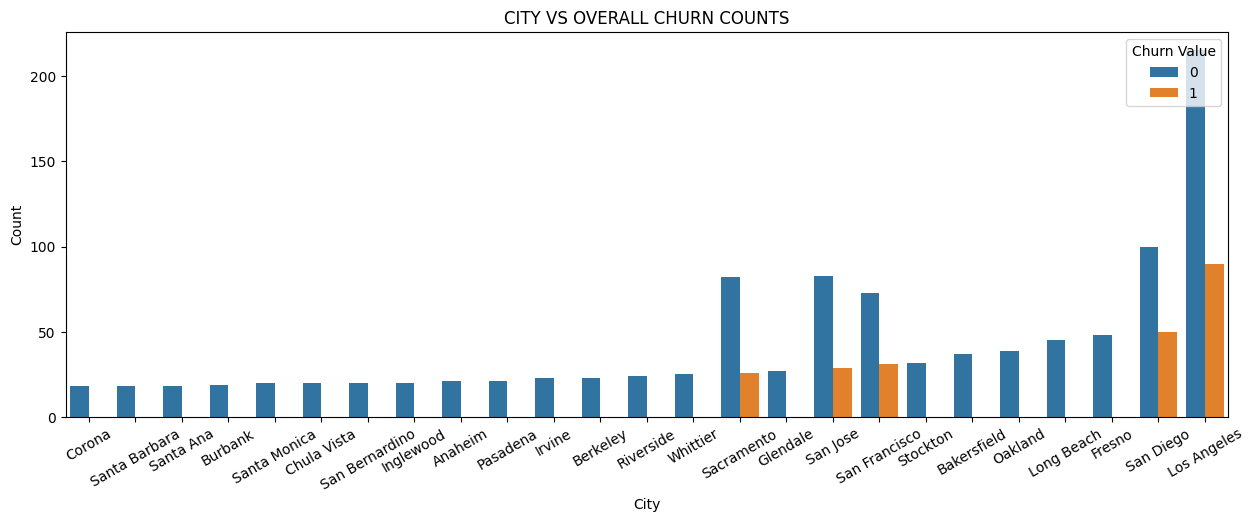

In [15]:
df2= df.groupby(["Country","State","City","Churn Value"]).agg({"Count":sum}).reset_index().sort_values(by='Count',ascending=True)
plt.figure(figsize=(15,5))
plt.xticks(rotation=30)
sns.barplot(x='City',y='Count',data=df2.tail(30),hue='Churn Value')
plt.title("CITY VS OVERALL CHURN COUNTS")

In [16]:
df.columns

Index(['Count', 'Country', 'State', 'City', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV'],
      dtype='object')

/tmp/ipykernel_16/2731811900.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df3 =df.groupby(['Gender','Churn Value']).agg({"Count":sum}).reset_index()


Text(0.5, 1.0, 'Gender Vs Churn Value')

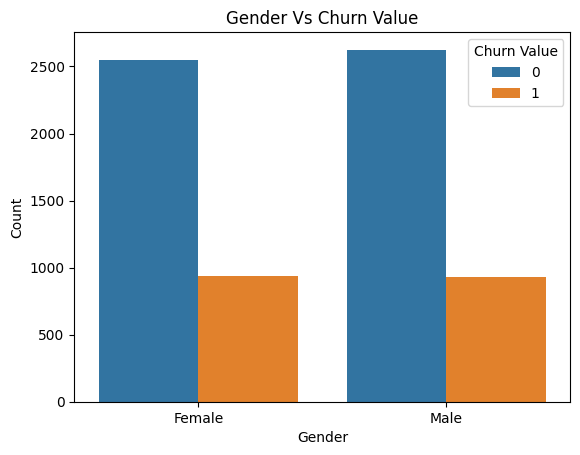

In [17]:
df3 =df.groupby(['Gender','Churn Value']).agg({"Count":sum}).reset_index()
sns.barplot(x='Gender',y='Count',hue='Churn Value',data=df3)
plt.title("Gender Vs Churn Value")

/tmp/ipykernel_16/664913422.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df3 =df.groupby(['Senior Citizen','Churn Value']).agg({"Count":sum}).reset_index()


Text(0.5, 1.0, 'Senior Citizen Vs Churn Value')

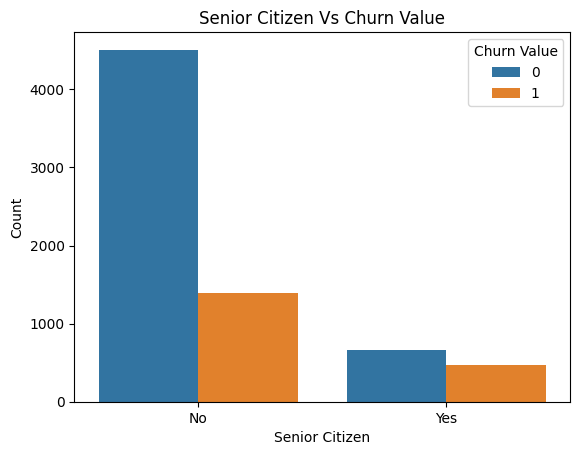

In [18]:
df3 =df.groupby(['Senior Citizen','Churn Value']).agg({"Count":sum}).reset_index()
sns.barplot(x='Senior Citizen',y='Count',hue='Churn Value',data=df3)
plt.title("Senior Citizen Vs Churn Value")

/tmp/ipykernel_16/195495762.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df3 =df.groupby(['Partner','Churn Value']).agg({"Count":sum}).reset_index()


Text(0.5, 1.0, 'Partner Vs Churn Value')

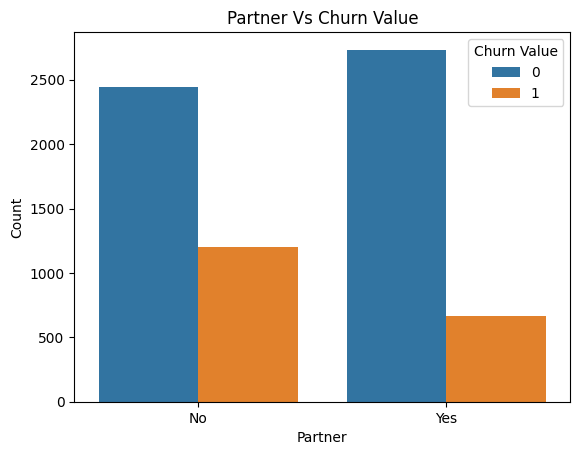

In [19]:
df3 =df.groupby(['Partner','Churn Value']).agg({"Count":sum}).reset_index()
sns.barplot(x='Partner',y='Count',hue='Churn Value',data=df3)
plt.title("Partner Vs Churn Value")

In [20]:
from IPython.display import display, Markdown


/tmp/ipykernel_16/1171444306.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df3 =df.groupby(['Dependents','Churn Value']).agg({"Count":sum}).reset_index()


Text(0.5, 1.0, 'Dependents Vs Churn Value')

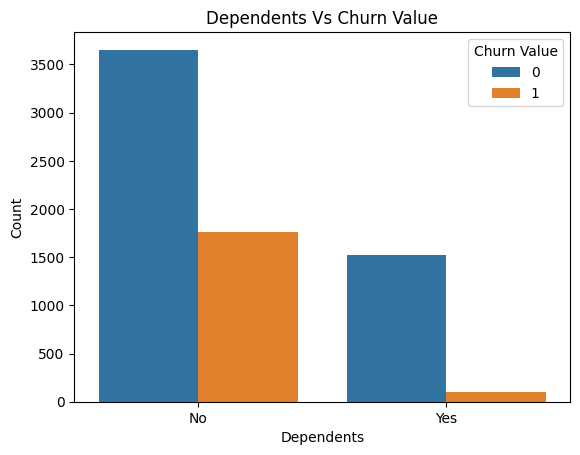

In [21]:
df3 =df.groupby(['Dependents','Churn Value']).agg({"Count":sum}).reset_index()
sns.barplot(x='Dependents',y='Count',hue='Churn Value',data=df3)
plt.title("Dependents Vs Churn Value")


/tmp/ipykernel_16/3318644093.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df3 =df.groupby(['Tenure Months','Churn Value']).agg({"Count":sum}).reset_index().sort_values(by='Tenure Months')


Text(0.5, 1.0, 'Tenure Months Vs Churn Value')

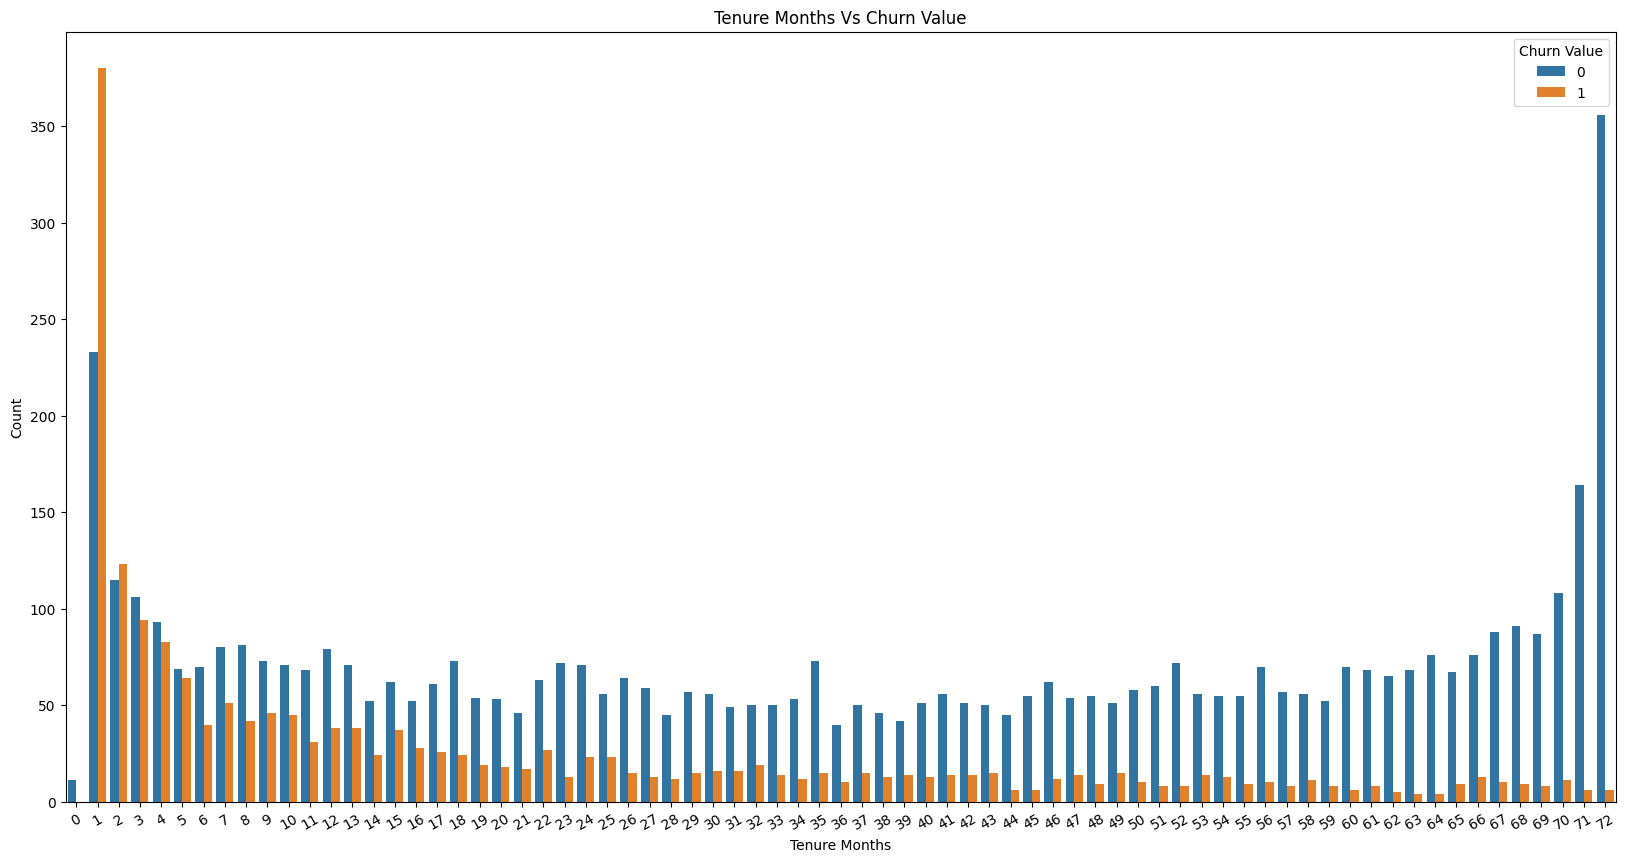

In [22]:
df3 =df.groupby(['Tenure Months','Churn Value']).agg({"Count":sum}).reset_index().sort_values(by='Tenure Months')
plt.figure(figsize=(20,10))
plt.xticks(rotation=30)
sns.barplot(x='Tenure Months',y='Count',hue='Churn Value',data=df3)
plt.title("Tenure Months Vs Churn Value")

/tmp/ipykernel_16/535568083.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df3 =df.groupby(['Phone Service','Churn Value']).agg({"Count":sum}).reset_index().sort_values(by='Phone Service')


Text(0.5, 1.0, "'Phone Service' Vs Churn Value")

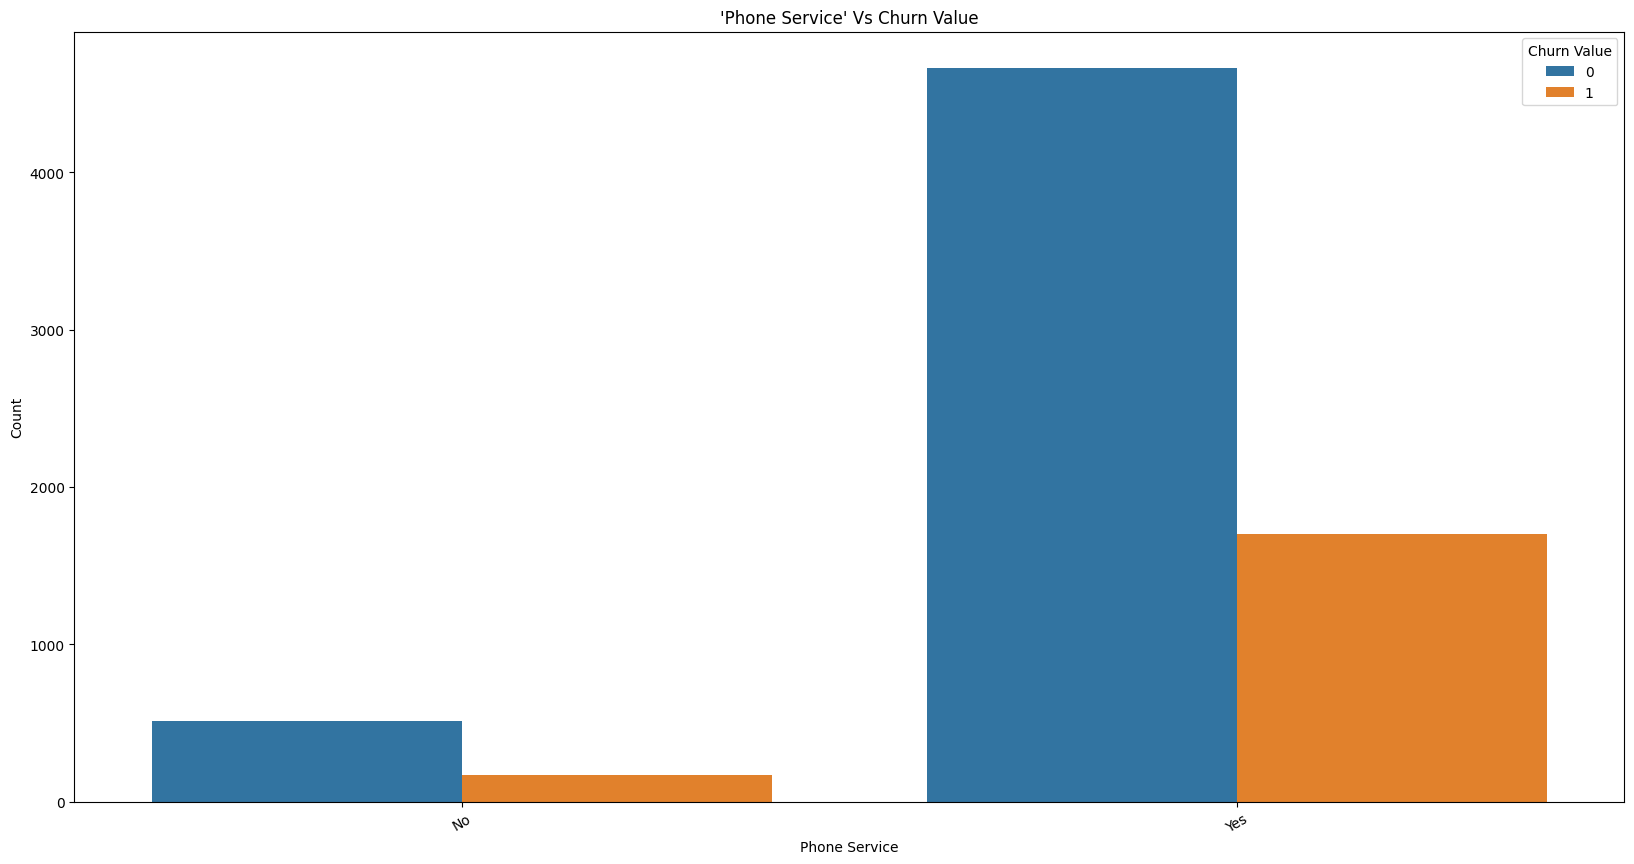

In [23]:

df3 =df.groupby(['Phone Service','Churn Value']).agg({"Count":sum}).reset_index().sort_values(by='Phone Service')
plt.figure(figsize=(20,10))
plt.xticks(rotation=30)
sns.barplot(x='Phone Service',y='Count',hue='Churn Value',data=df3)
plt.title("'Phone Service' Vs Churn Value")

In [24]:
df[['Phone Service']].value_counts().reset_index()

,Phone Service,count
0,Yes,6361
1,No,682


/tmp/ipykernel_16/2049133639.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df3 =df.groupby(['Multiple Lines','Churn Value']).agg({"Count":sum}).reset_index().sort_values(by='Multiple Lines')


Text(0.5, 1.0, "'Multiple Lines' Vs Churn Value")

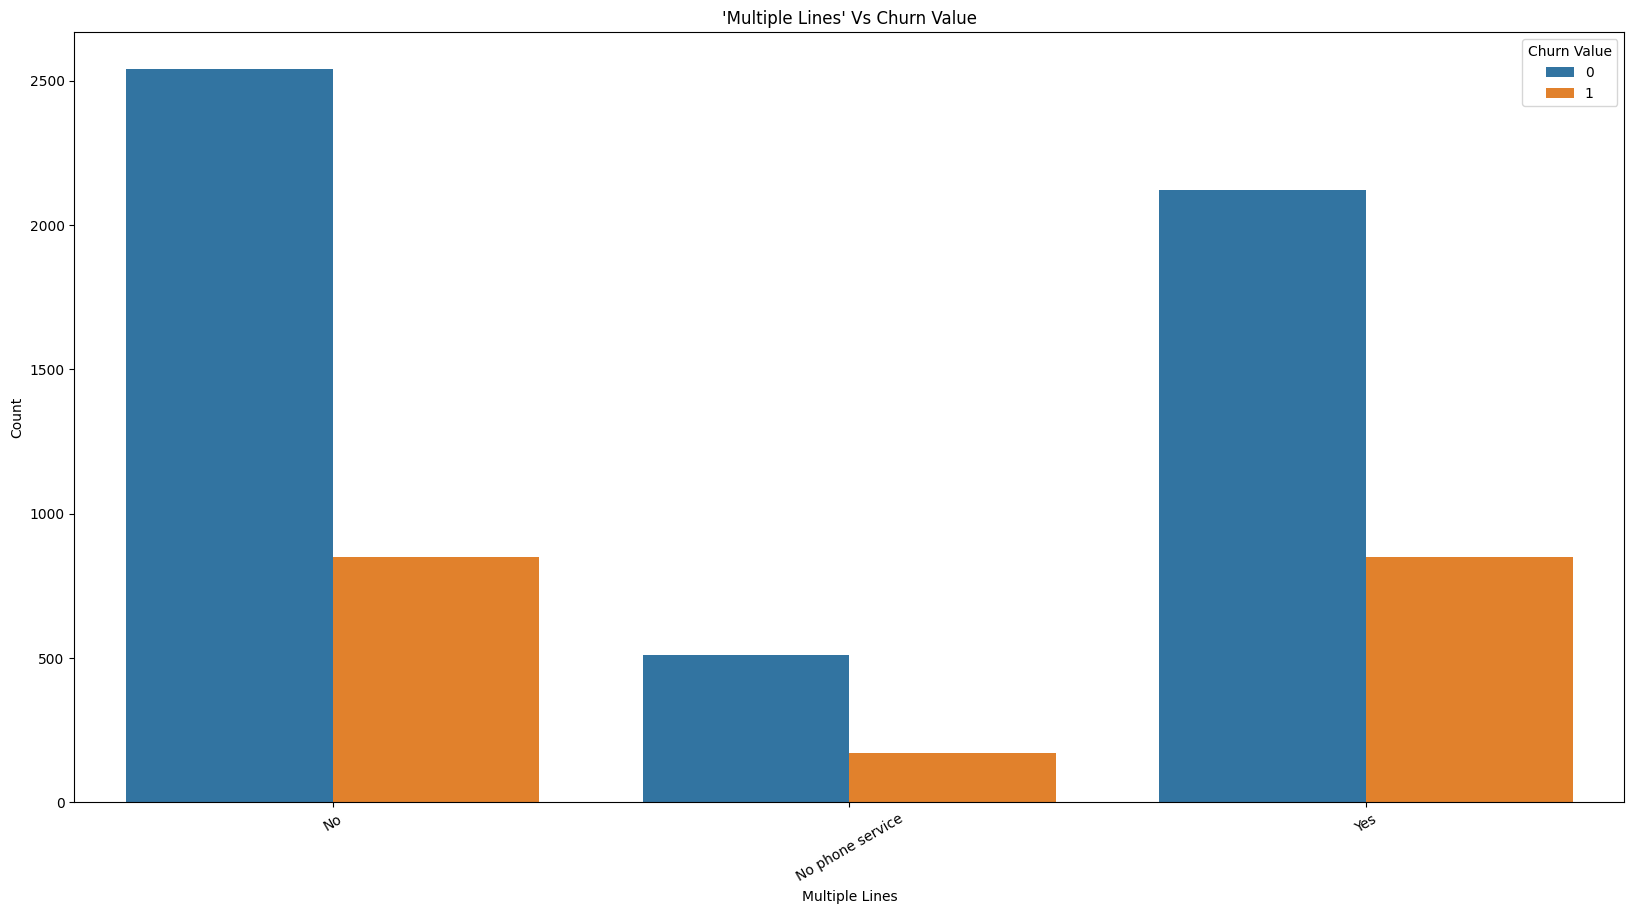

In [25]:

df3 =df.groupby(['Multiple Lines','Churn Value']).agg({"Count":sum}).reset_index().sort_values(by='Multiple Lines')
plt.figure(figsize=(20,10))
plt.xticks(rotation=30)
sns.barplot(x='Multiple Lines',y='Count',hue='Churn Value',data=df3)
plt.title("'Multiple Lines' Vs Churn Value")

/tmp/ipykernel_16/1406819899.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df3 =df.groupby(['Internet Service','Churn Value']).agg({"Count":sum}).reset_index().sort_values(by='Internet Service')


Text(0.5, 1.0, "'Internet Service Vs Churn Value")

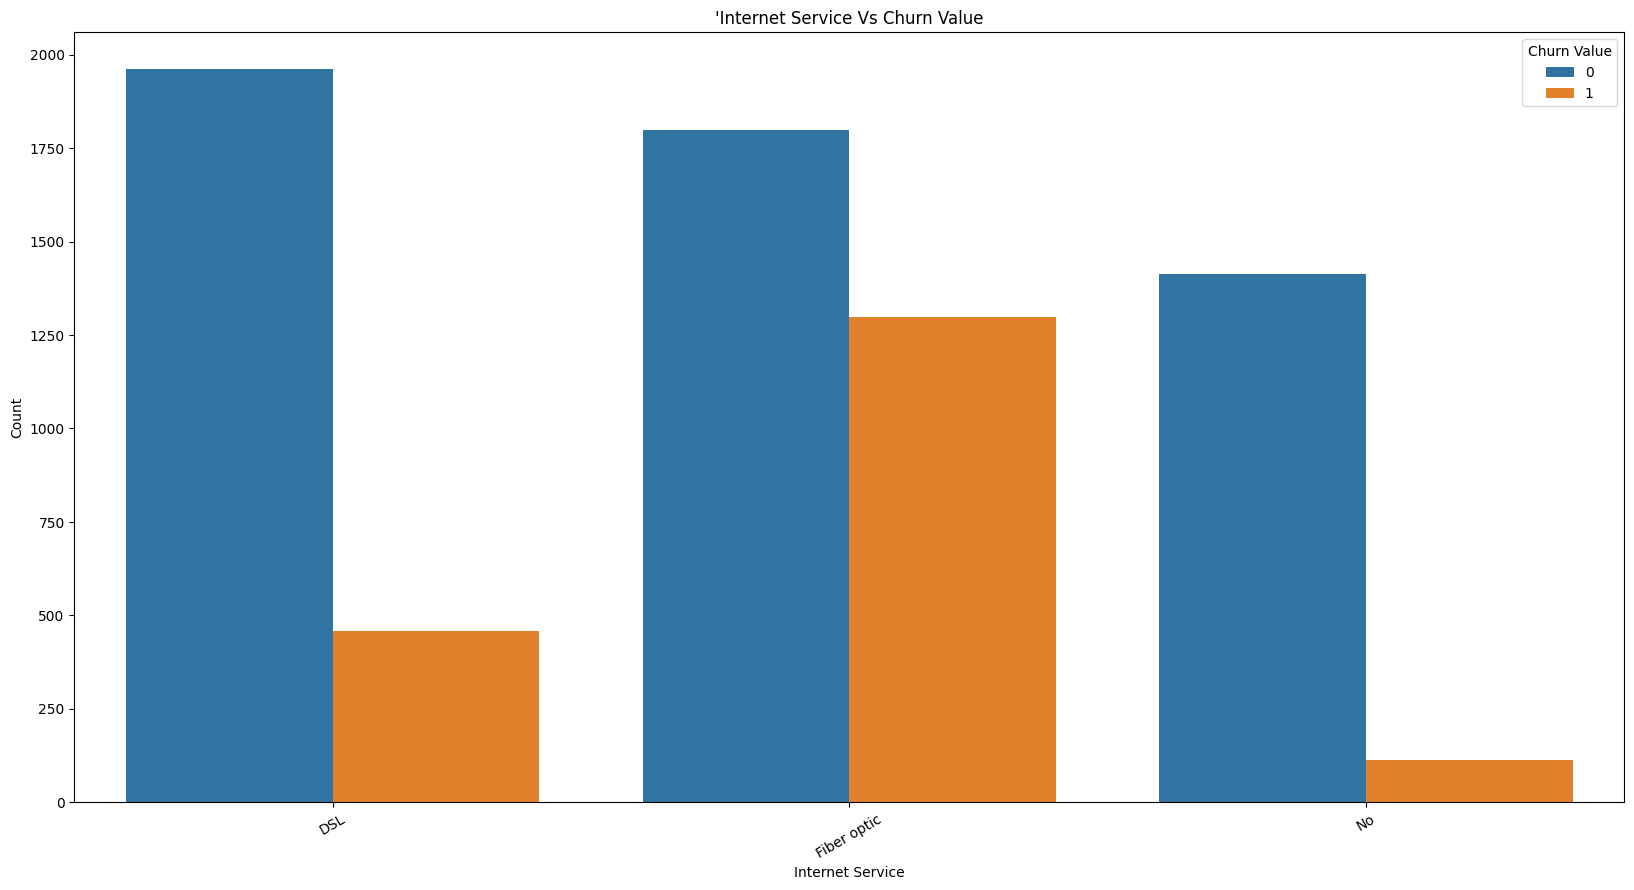

In [26]:


df3 =df.groupby(['Internet Service','Churn Value']).agg({"Count":sum}).reset_index().sort_values(by='Internet Service')
plt.figure(figsize=(20,10))
plt.xticks(rotation=30)
sns.barplot(x='Internet Service',y='Count',hue='Churn Value',data=df3)
plt.title("'Internet Service Vs Churn Value")

/tmp/ipykernel_16/258584125.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df3 =df.groupby(['Online Security','Churn Value']).agg({"Count":sum}).reset_index().sort_values(by='Online Security')


Text(0.5, 1.0, "'Online Security Vs Churn Value")

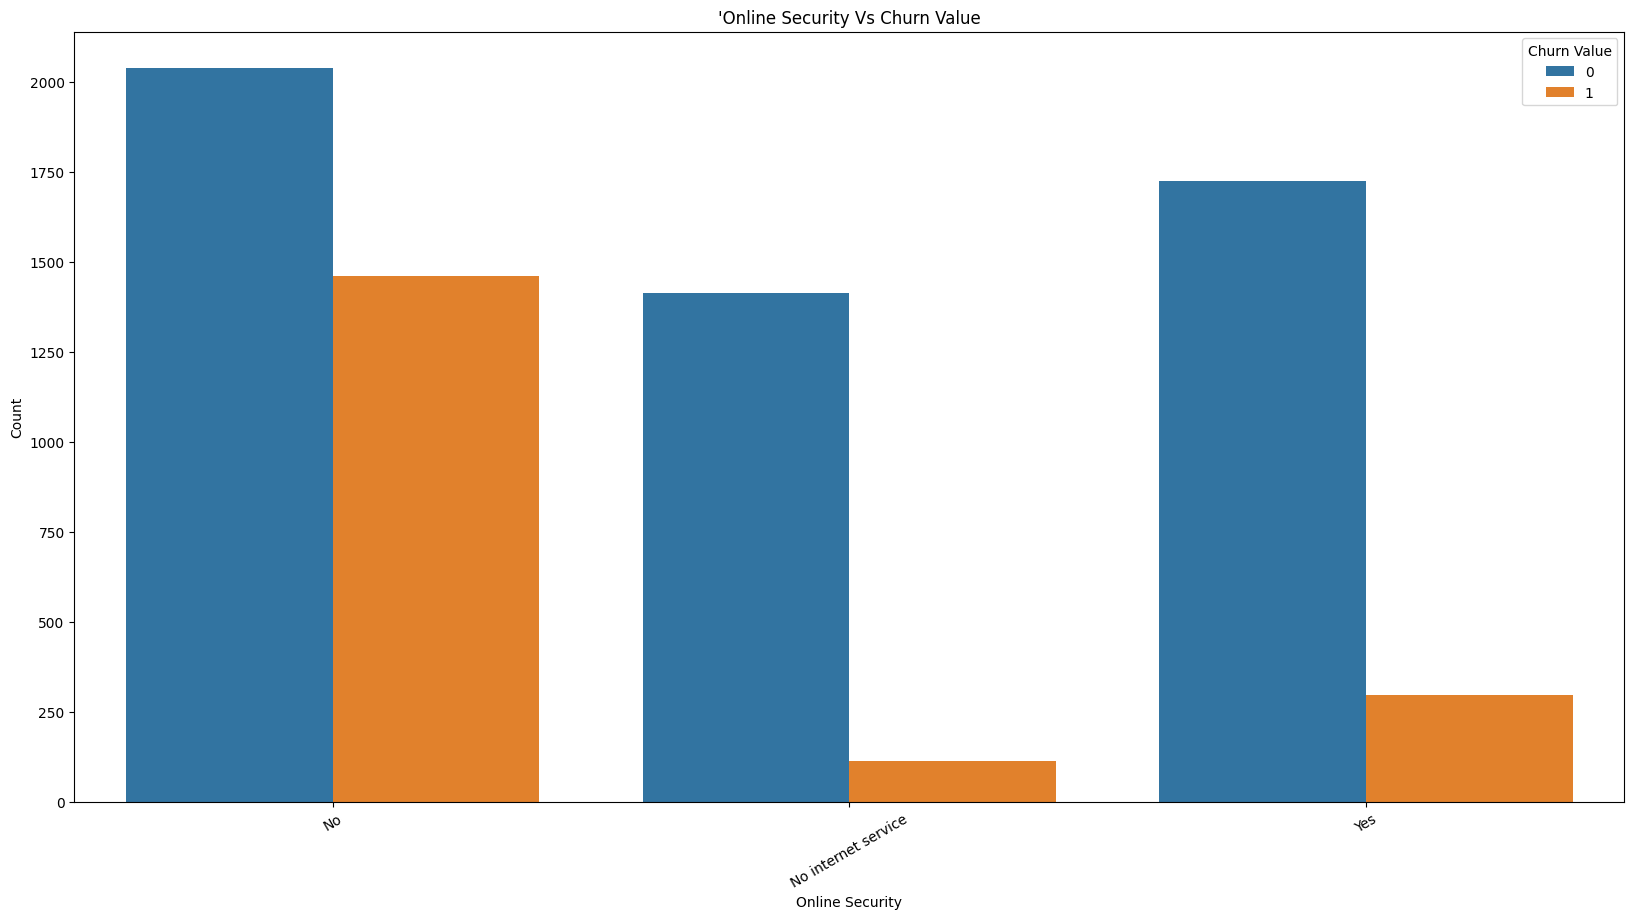

In [27]:


df3 =df.groupby(['Online Security','Churn Value']).agg({"Count":sum}).reset_index().sort_values(by='Online Security')
plt.figure(figsize=(20,10))
plt.xticks(rotation=30)
sns.barplot(x='Online Security',y='Count',hue='Churn Value',data=df3)
plt.title("'Online Security Vs Churn Value")

/tmp/ipykernel_16/2934002454.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df3 =df.groupby(['Online Backup','Churn Value']).agg({"Count":sum}).reset_index().sort_values(by='Online Backup')


Text(0.5, 1.0, "'Online Backup' Vs Churn Value")

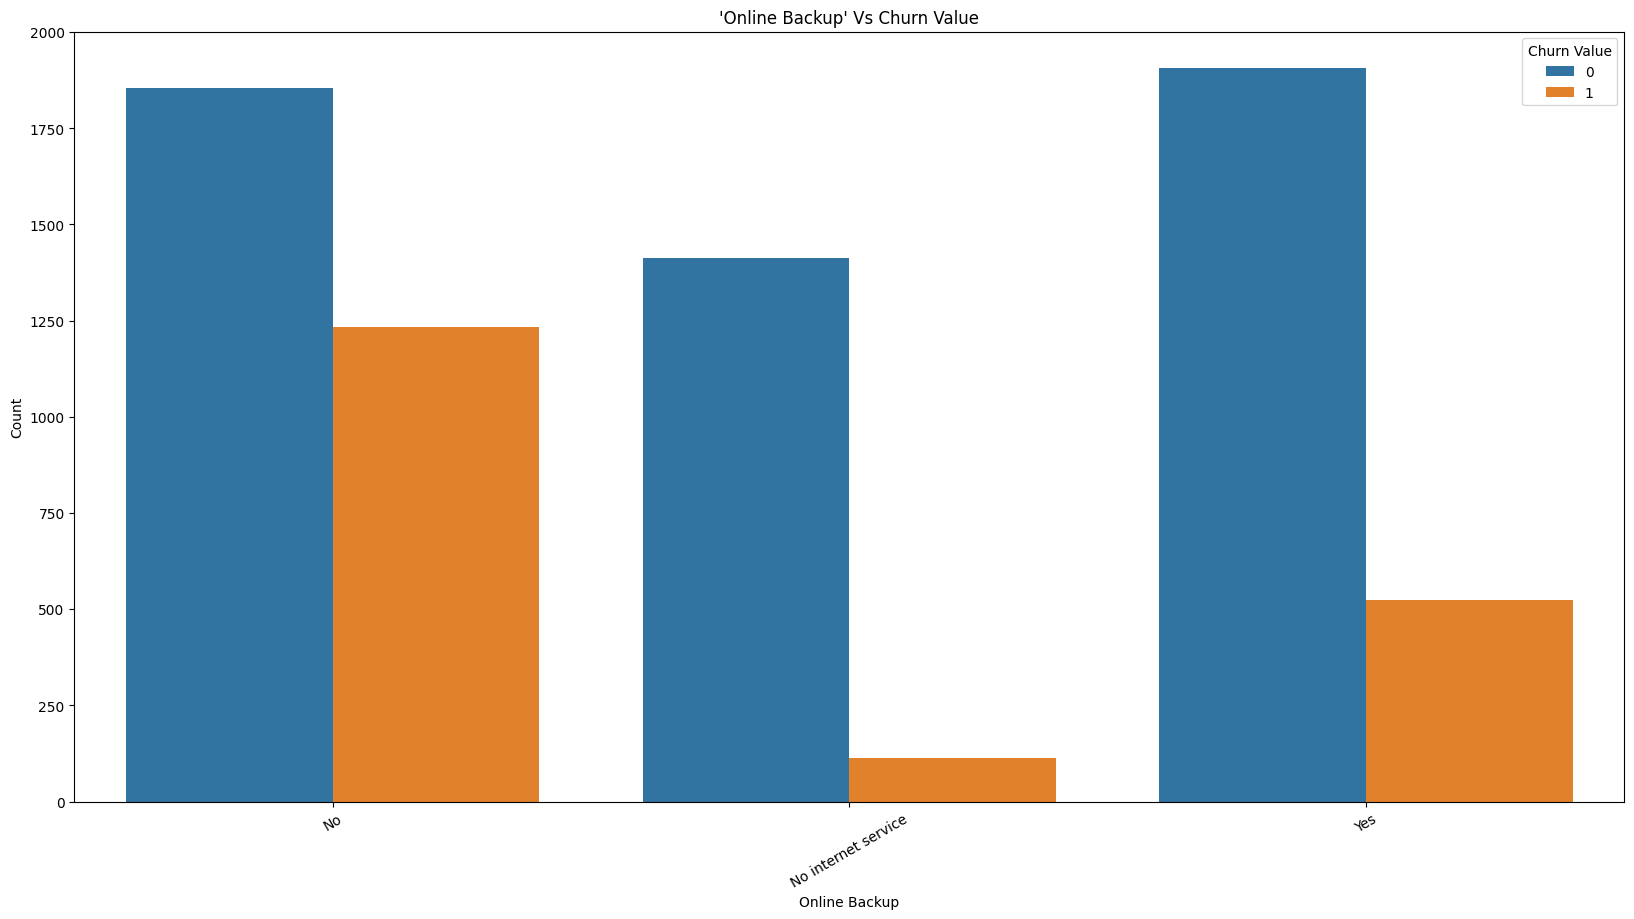

In [28]:


df3 =df.groupby(['Online Backup','Churn Value']).agg({"Count":sum}).reset_index().sort_values(by='Online Backup')
plt.figure(figsize=(20,10))
plt.xticks(rotation=30)
sns.barplot(x='Online Backup',y='Count',hue='Churn Value',data=df3)
plt.title("'Online Backup' Vs Churn Value")

/tmp/ipykernel_16/4137022156.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df3 =df.groupby(['Device Protection','Churn Value']).agg({"Count":sum}).reset_index().sort_values(by='Device Protection')


Text(0.5, 1.0, 'Device Protection Vs Churn Value')

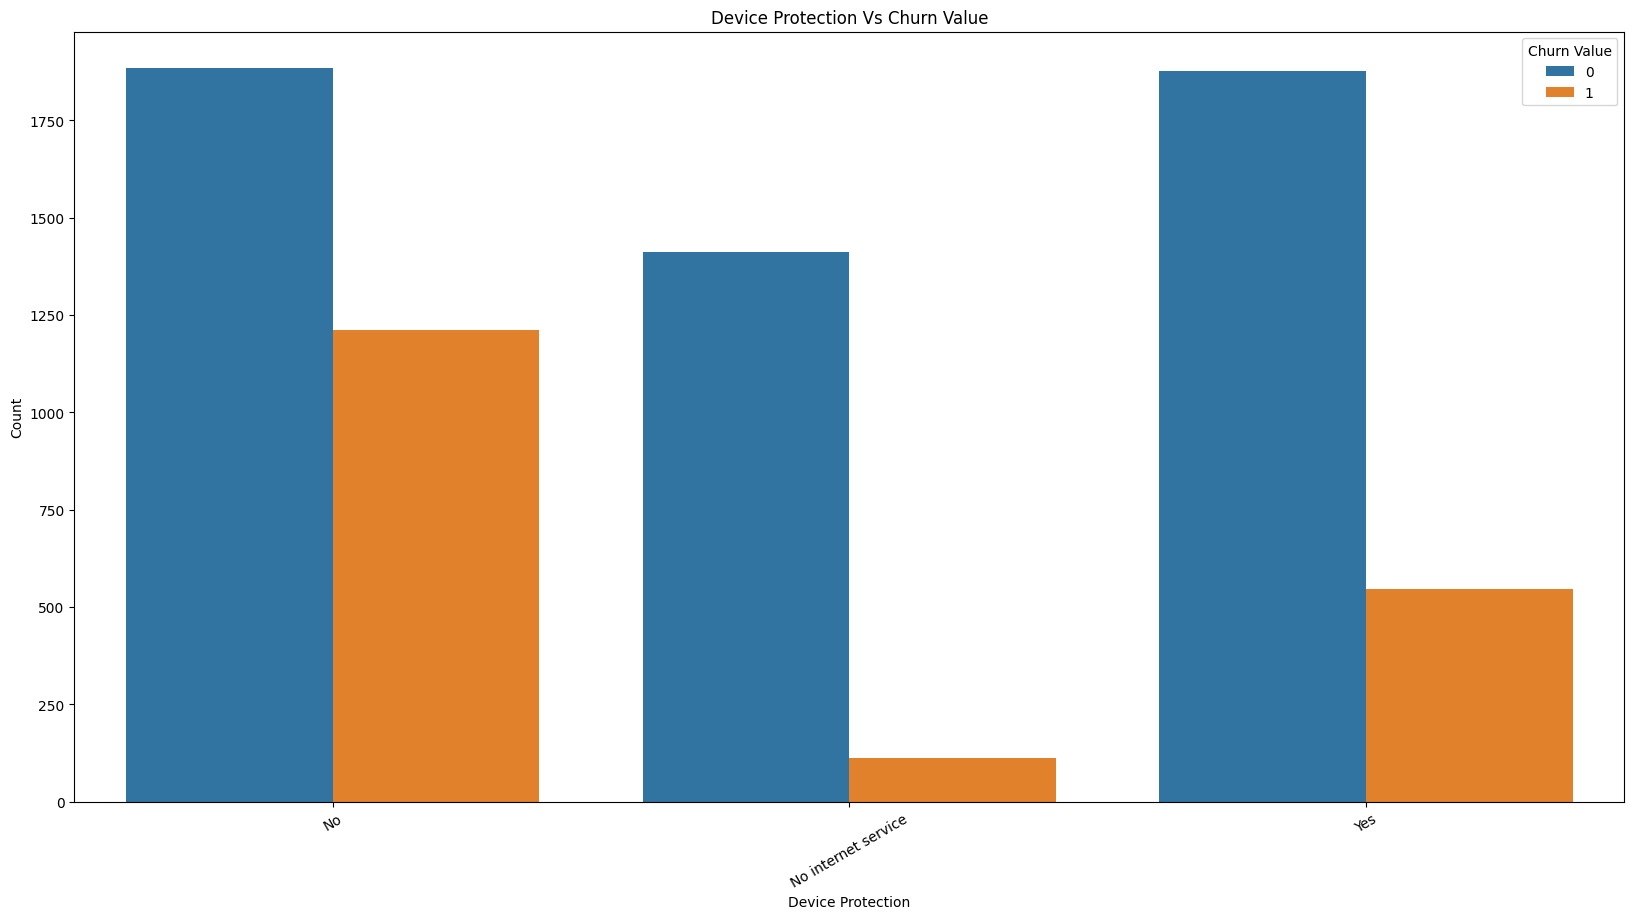

In [29]:


df3 =df.groupby(['Device Protection','Churn Value']).agg({"Count":sum}).reset_index().sort_values(by='Device Protection')
plt.figure(figsize=(20,10))
plt.xticks(rotation=30)
sns.barplot(x='Device Protection',y='Count',hue='Churn Value',data=df3)
plt.title("Device Protection Vs Churn Value")

/tmp/ipykernel_16/3280398901.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df3 =df.groupby(['Tech Support','Churn Value']).agg({"Count":sum}).reset_index().sort_values(by='Tech Support')


<Axes: xlabel='Tech Support', ylabel='Count'>

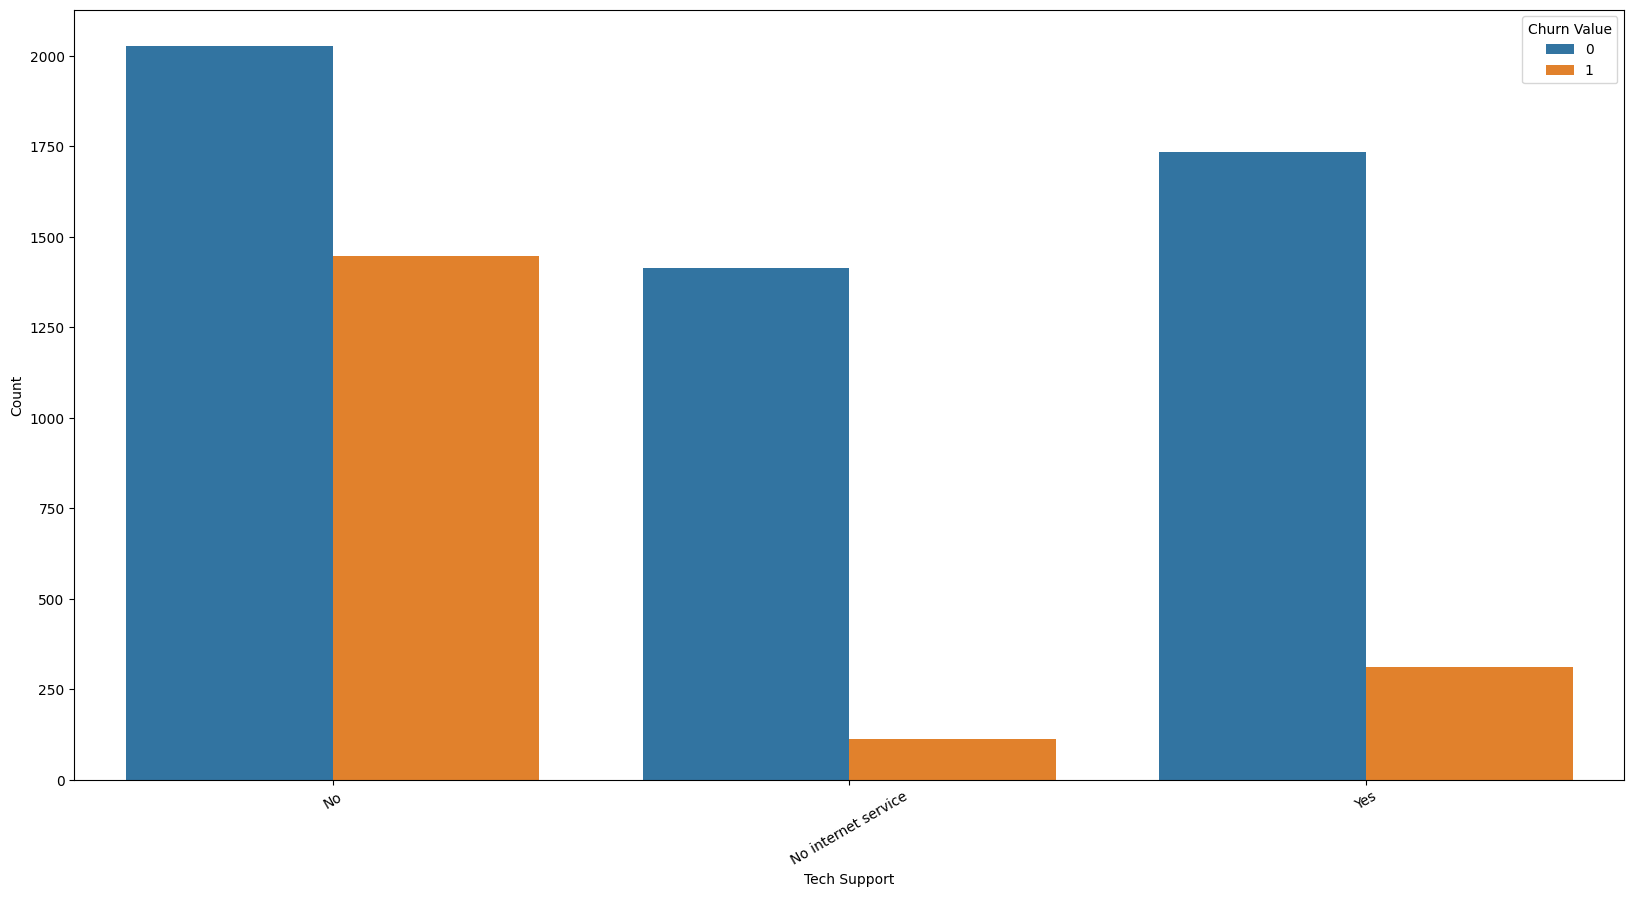

In [30]:


df3 =df.groupby(['Tech Support','Churn Value']).agg({"Count":sum}).reset_index().sort_values(by='Tech Support')
plt.figure(figsize=(20,10))
plt.xticks(rotation=30)
sns.barplot(x='Tech Support',y='Count',hue='Churn Value',data=df3)


/tmp/ipykernel_16/1524523068.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df3 =df.groupby(['Streaming TV','Churn Value']).agg({"Count":sum}).reset_index().sort_values(by='Streaming TV')


<Axes: xlabel='Streaming TV', ylabel='Count'>

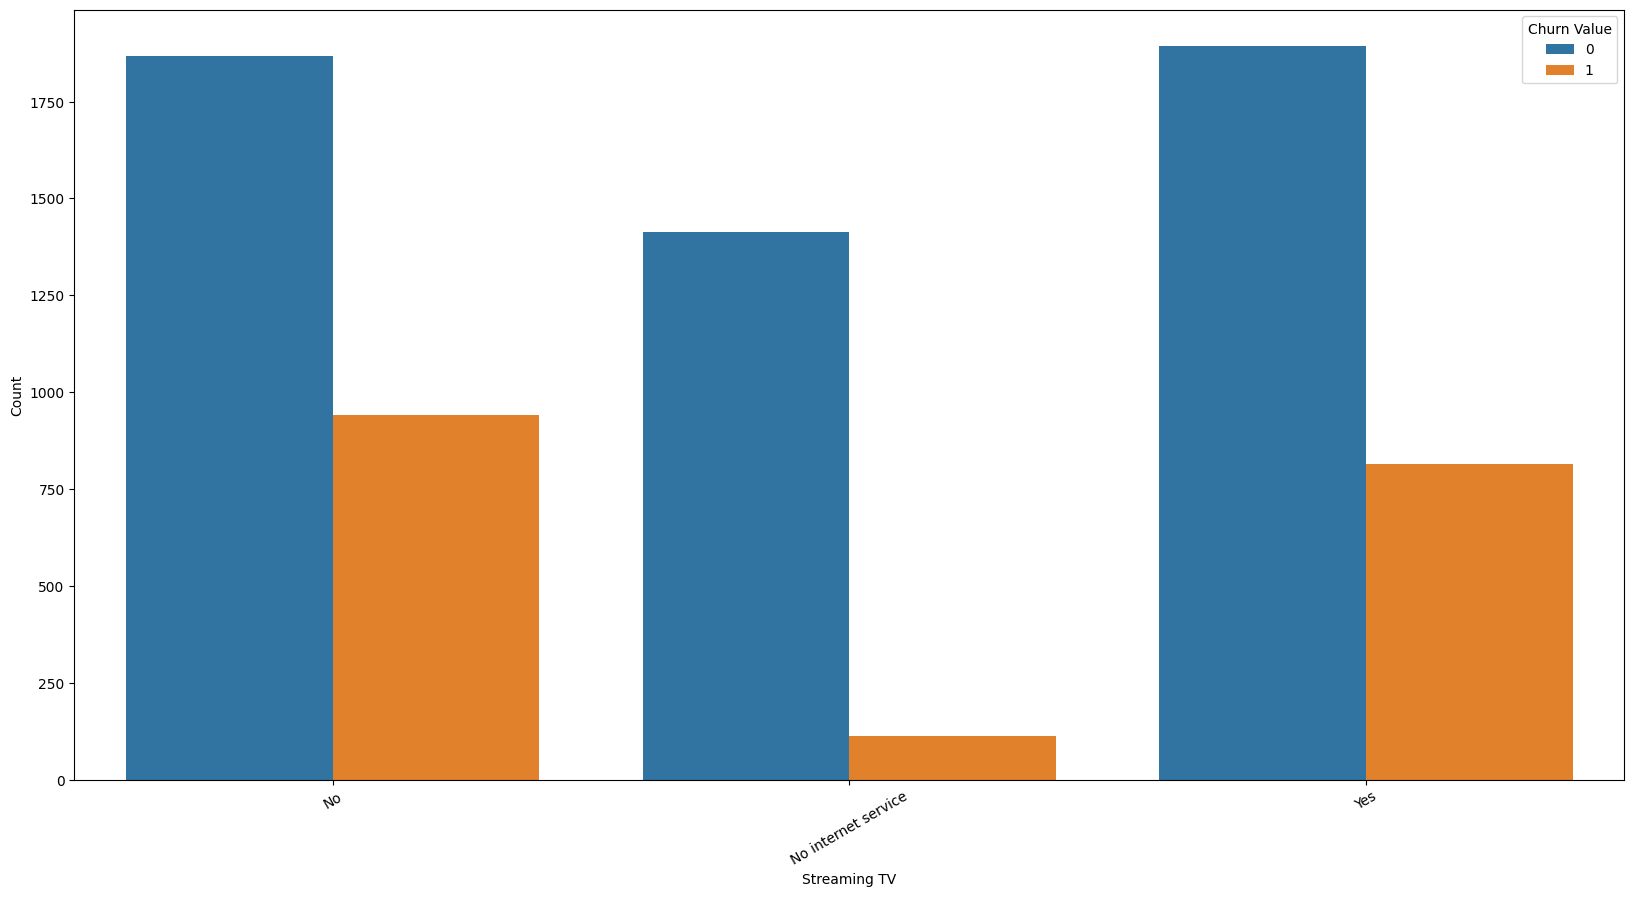

In [31]:


df3 =df.groupby(['Streaming TV','Churn Value']).agg({"Count":sum}).reset_index().sort_values(by='Streaming TV')
plt.figure(figsize=(20,10))
plt.xticks(rotation=30)
sns.barplot(x='Streaming TV',y='Count',hue='Churn Value',data=df3)


/tmp/ipykernel_16/372696578.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df3 =df.groupby(['Streaming Movies','Churn Value']).agg({"Count":sum}).reset_index().sort_values(by='Streaming Movies')


<Axes: xlabel='Streaming Movies', ylabel='Count'>

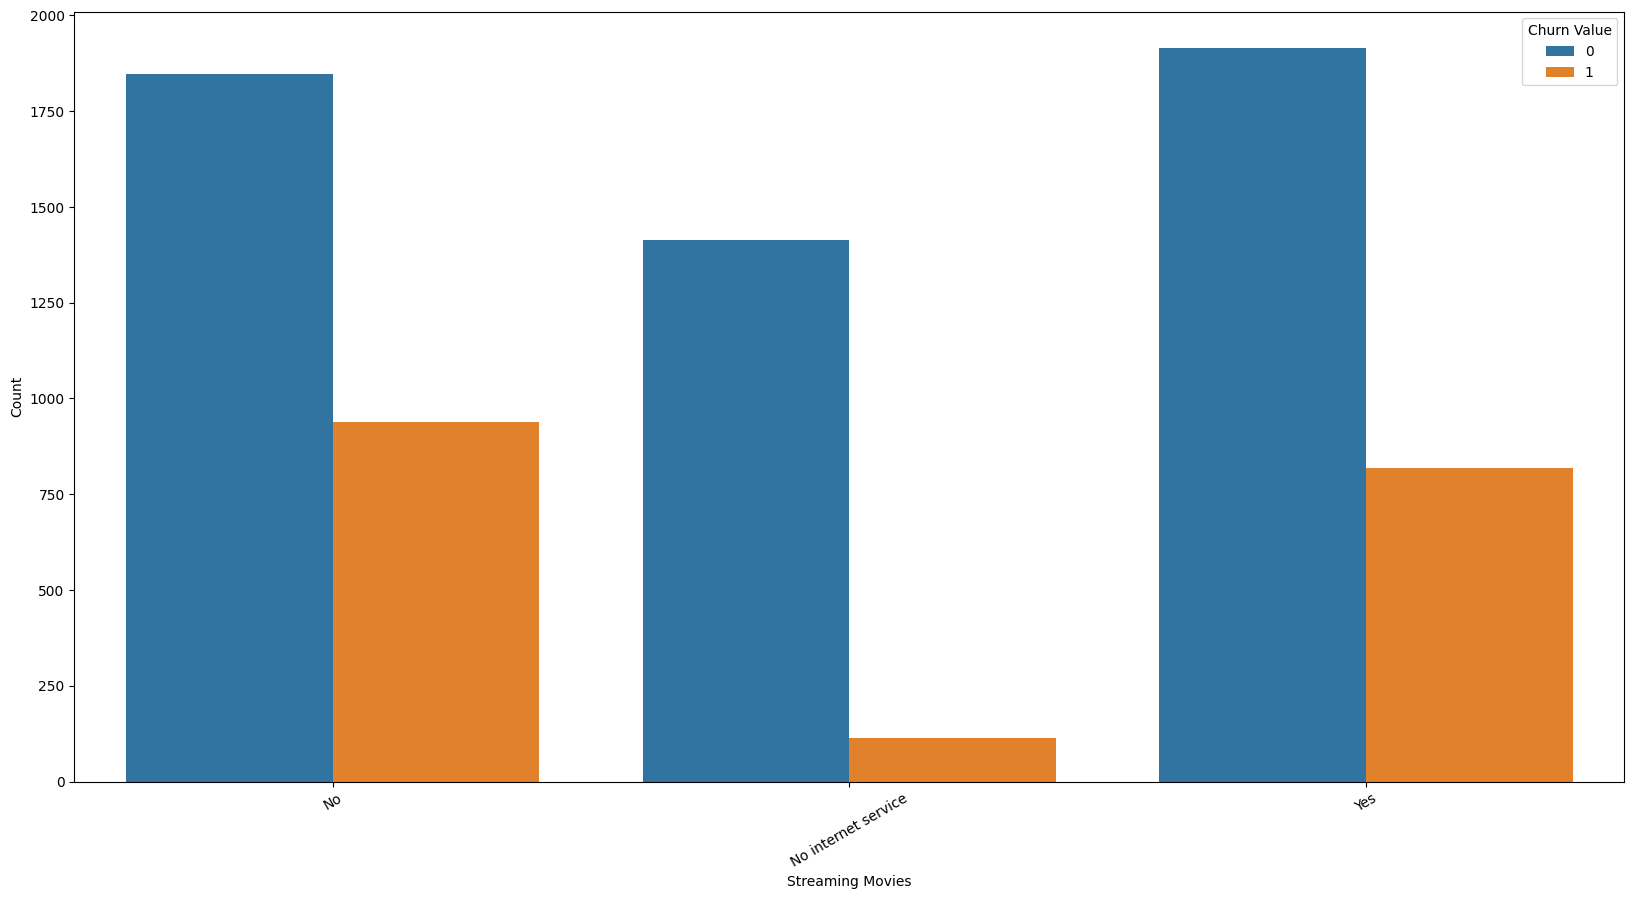

In [32]:


df3 =df.groupby(['Streaming Movies','Churn Value']).agg({"Count":sum}).reset_index().sort_values(by='Streaming Movies')
plt.figure(figsize=(20,10))
plt.xticks(rotation=30)
sns.barplot(x='Streaming Movies',y='Count',hue='Churn Value',data=df3)


/tmp/ipykernel_16/2085675439.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df3 =df.groupby(['Contract','Churn Value']).agg({"Count":sum}).reset_index().sort_values(by='Contract')


<Axes: xlabel='Contract', ylabel='Count'>

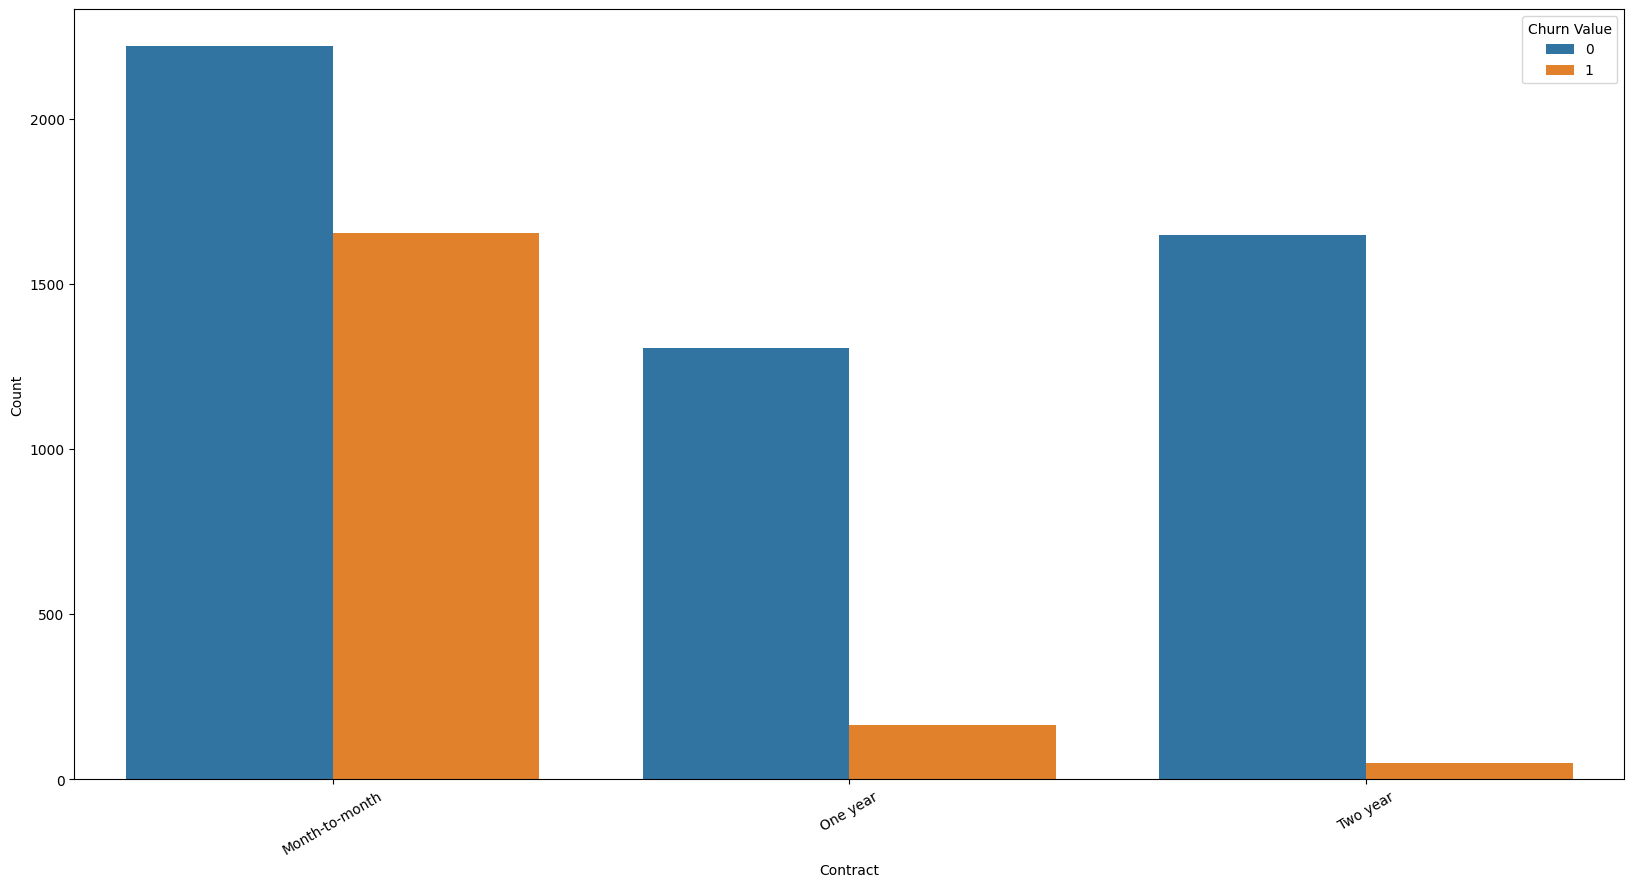

In [33]:


df3 =df.groupby(['Contract','Churn Value']).agg({"Count":sum}).reset_index().sort_values(by='Contract')
plt.figure(figsize=(20,10))
plt.xticks(rotation=30)
sns.barplot(x='Contract',y='Count',hue='Churn Value',data=df3)


/tmp/ipykernel_16/3990229912.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df3 =df.groupby(['Paperless Billing','Churn Value']).agg({"Count":sum}).reset_index().sort_values(by='Paperless Billing')


<Axes: xlabel='Paperless Billing', ylabel='Count'>

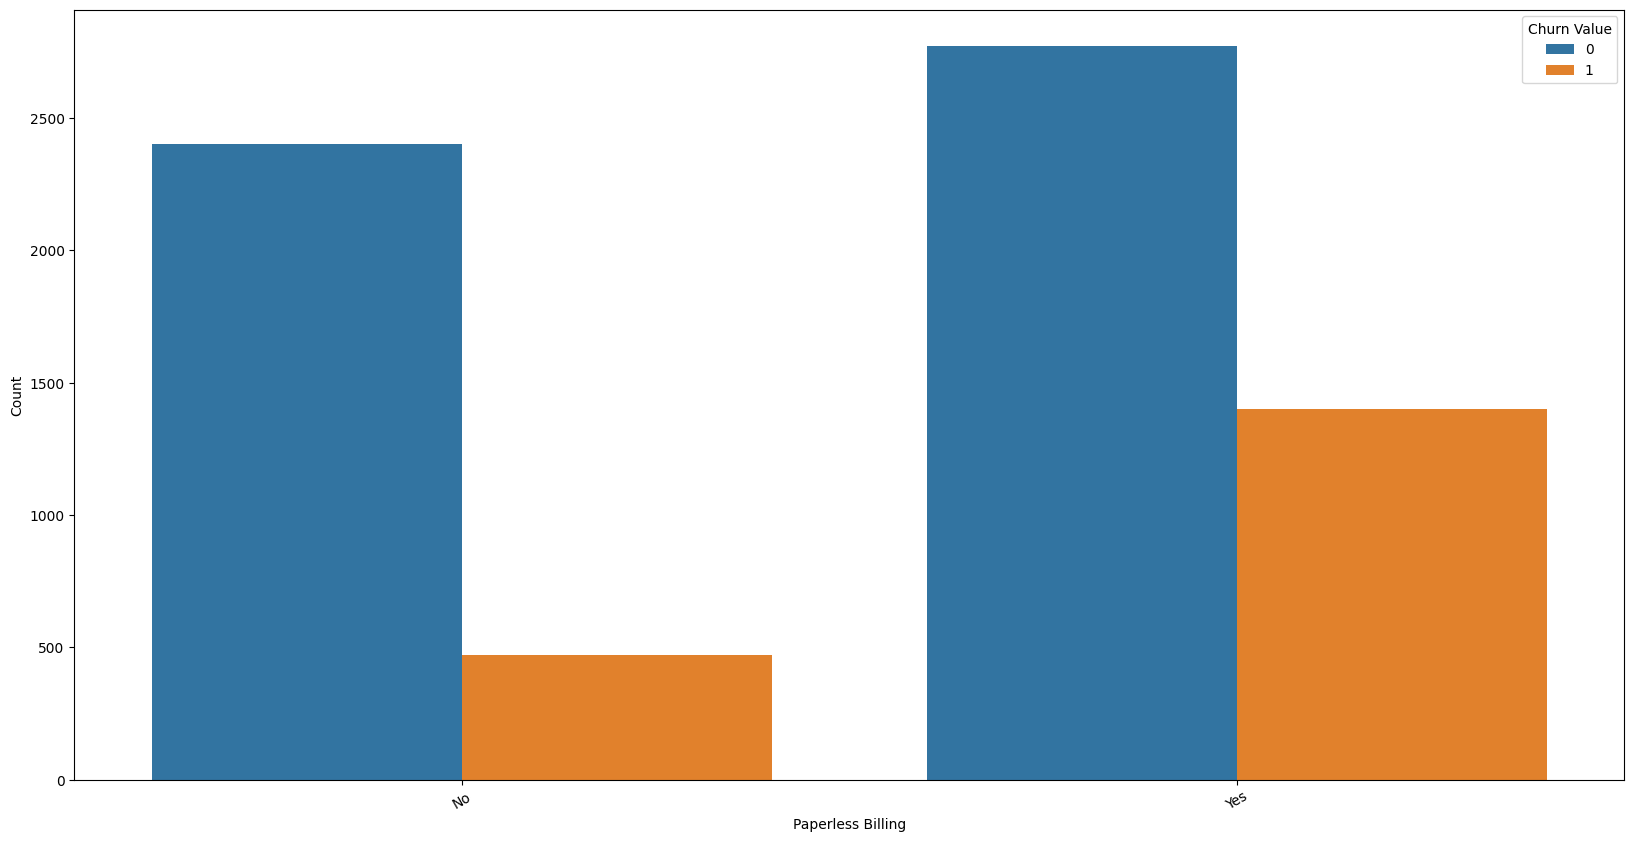

In [34]:


df3 =df.groupby(['Paperless Billing','Churn Value']).agg({"Count":sum}).reset_index().sort_values(by='Paperless Billing')
plt.figure(figsize=(20,10))
plt.xticks(rotation=30)
sns.barplot(x='Paperless Billing',y='Count',hue='Churn Value',data=df3)


/tmp/ipykernel_16/2940678612.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df3 =df.groupby(['Payment Method','Churn Value']).agg({"Count":sum}).reset_index().sort_values(by='Payment Method')


<Axes: xlabel='Payment Method', ylabel='Count'>

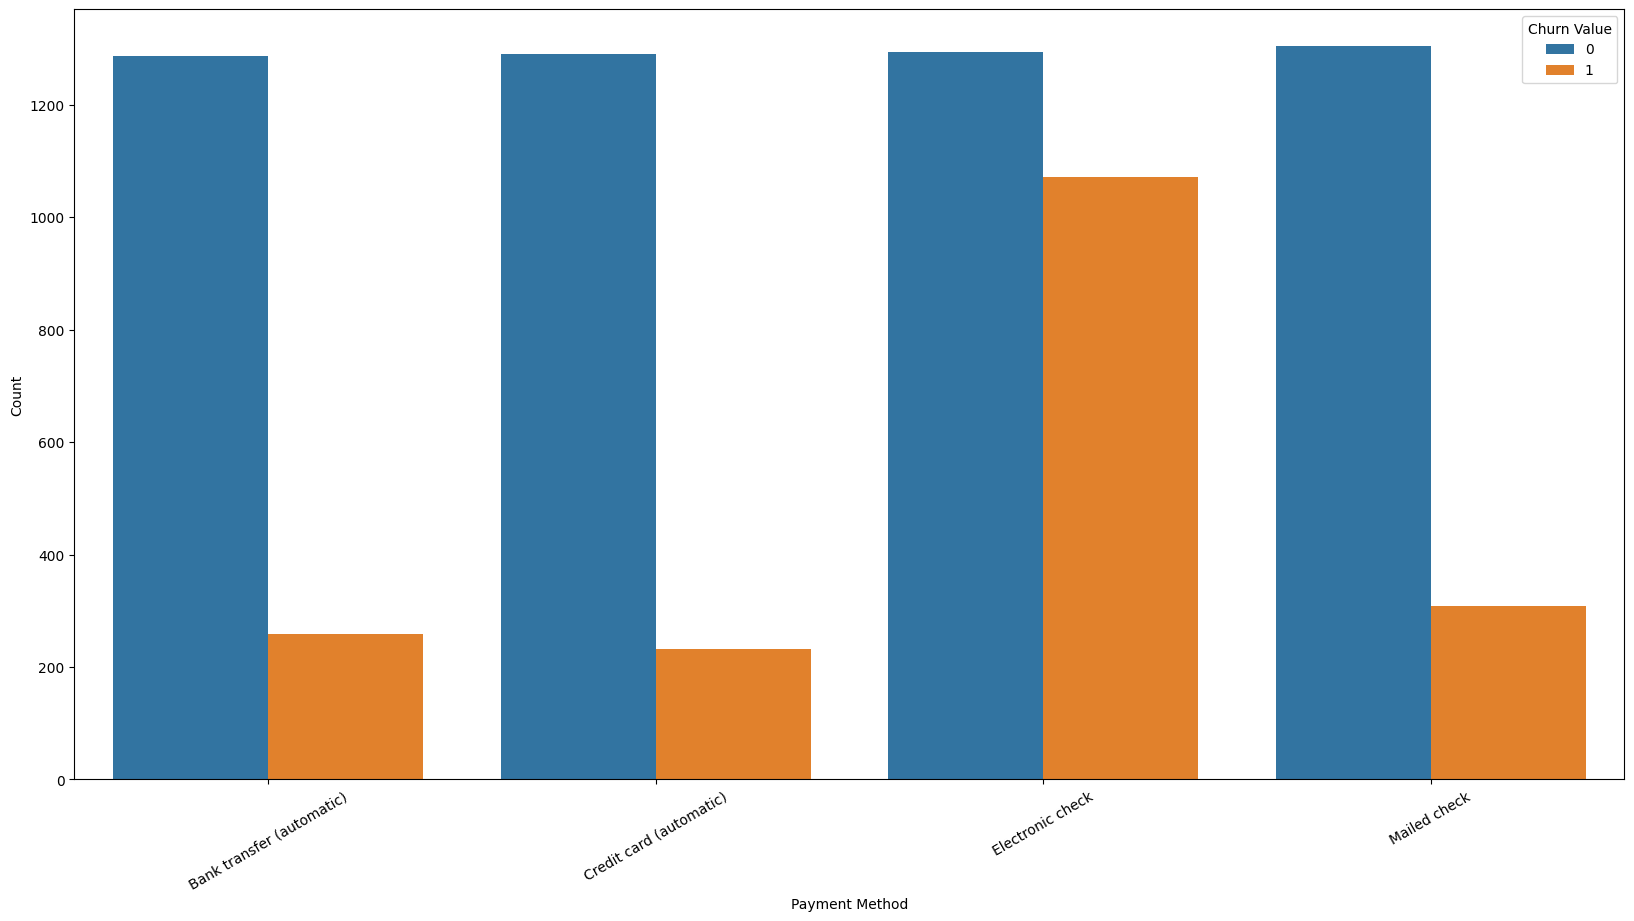

In [35]:



df3 =df.groupby(['Payment Method','Churn Value']).agg({"Count":sum}).reset_index().sort_values(by='Payment Method')
plt.figure(figsize=(20,10))
plt.xticks(rotation=30)
sns.barplot(x='Payment Method',y='Count',hue='Churn Value',data=df3)


<Axes: xlabel='Churn Value', ylabel='Monthly Charges'>

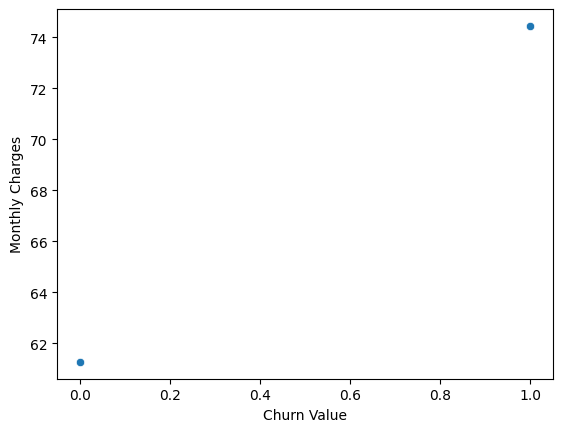

In [36]:



df5=df.groupby("Churn Value").agg({"Monthly Charges":'mean'}).reset_index()

sns.scatterplot(x='Churn Value',y='Monthly Charges',data=df5)


## Let us now analyse only those records where churn value is 0 . 

/tmp/ipykernel_16/4067356059.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df2= df[df['Churn Value']==0].groupby(["Country","State","City"]).agg({"Count":sum}).reset_index().sort_values(by='Count',ascending=True)


Text(0.5, 1.0, 'CITY VS OVERALL No-CHURN COUNTS')

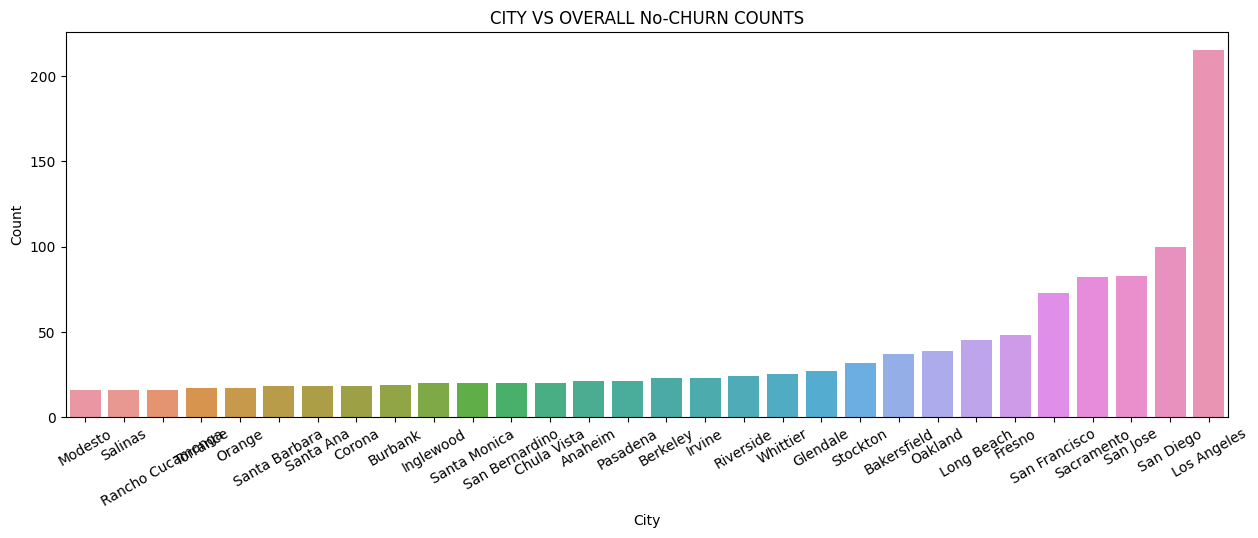

In [37]:

df2= df[df['Churn Value']==0].groupby(["Country","State","City"]).agg({"Count":sum}).reset_index().sort_values(by='Count',ascending=True)
plt.figure(figsize=(15,5))
plt.xticks(rotation=30)

sns.barplot(x='City',y='Count',data=df2.tail(30))
plt.title("CITY VS OVERALL No-CHURN COUNTS")

/tmp/ipykernel_16/1305511169.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df3 =df[df['Churn Value']==0].groupby(['Gender']).agg({"Count":sum}).reset_index()


Text(0.5, 1.0, 'Gender No-Churn Ratio')

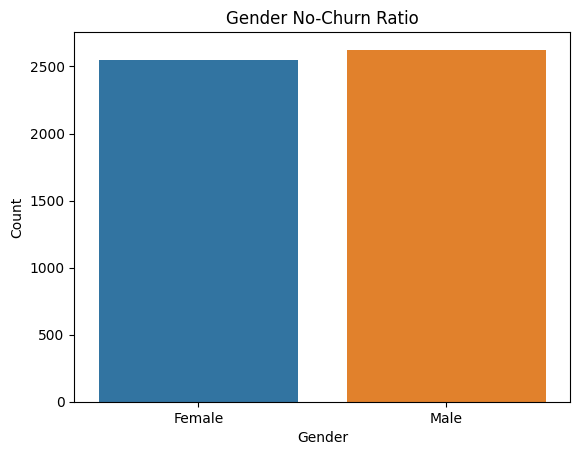

In [38]:
df3 =df[df['Churn Value']==0].groupby(['Gender']).agg({"Count":sum}).reset_index()
sns.barplot(x='Gender',y='Count',data=df3)
plt.title("Gender No-Churn Ratio")

/tmp/ipykernel_16/3210329433.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df3 =df[df['Churn Value']==0].groupby(['Senior Citizen']).agg({"Count":sum}).reset_index()


Text(0.5, 1.0, 'Senior Citizens No-Churn ratio')

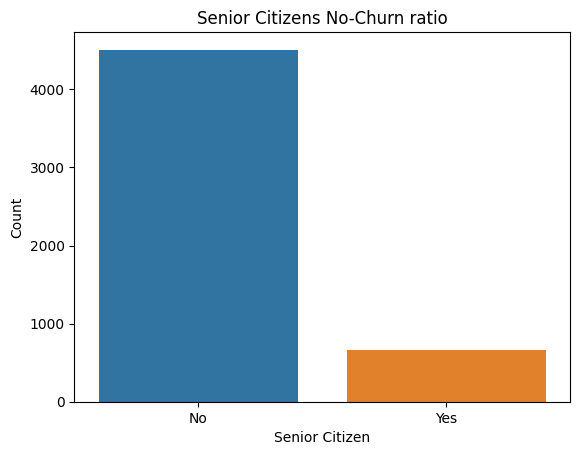

In [39]:
df3 =df[df['Churn Value']==0].groupby(['Senior Citizen']).agg({"Count":sum}).reset_index()
sns.barplot(x='Senior Citizen',y='Count',data=df3)
plt.title("Senior Citizens No-Churn ratio")

/tmp/ipykernel_16/3205177050.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df3 =df[df['Churn Value']==1].groupby(['Senior Citizen']).agg({"Count":sum}).reset_index()


Text(0.5, 1.0, 'Senior Citizens Churn ratio')

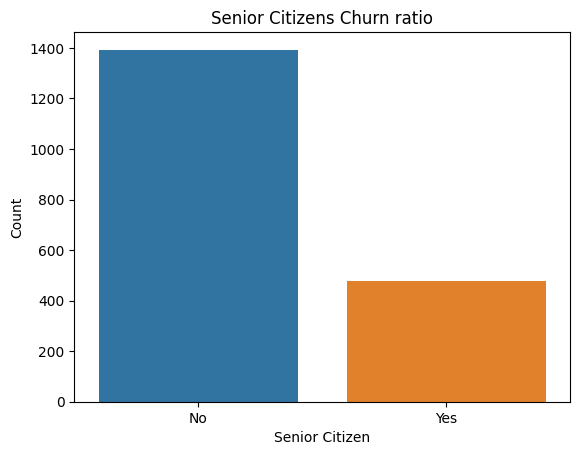

In [40]:
df3 =df[df['Churn Value']==1].groupby(['Senior Citizen']).agg({"Count":sum}).reset_index()
sns.barplot(x='Senior Citizen',y='Count',data=df3)
plt.title("Senior Citizens Churn ratio")

/tmp/ipykernel_16/2085458754.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df3 =df[df['Churn Value']==0].groupby(['Online Backup']).agg({"Count":sum}).reset_index().sort_values(by='Online Backup')


Text(0.5, 1.0, "'Online Backup' Vs Churn Value")

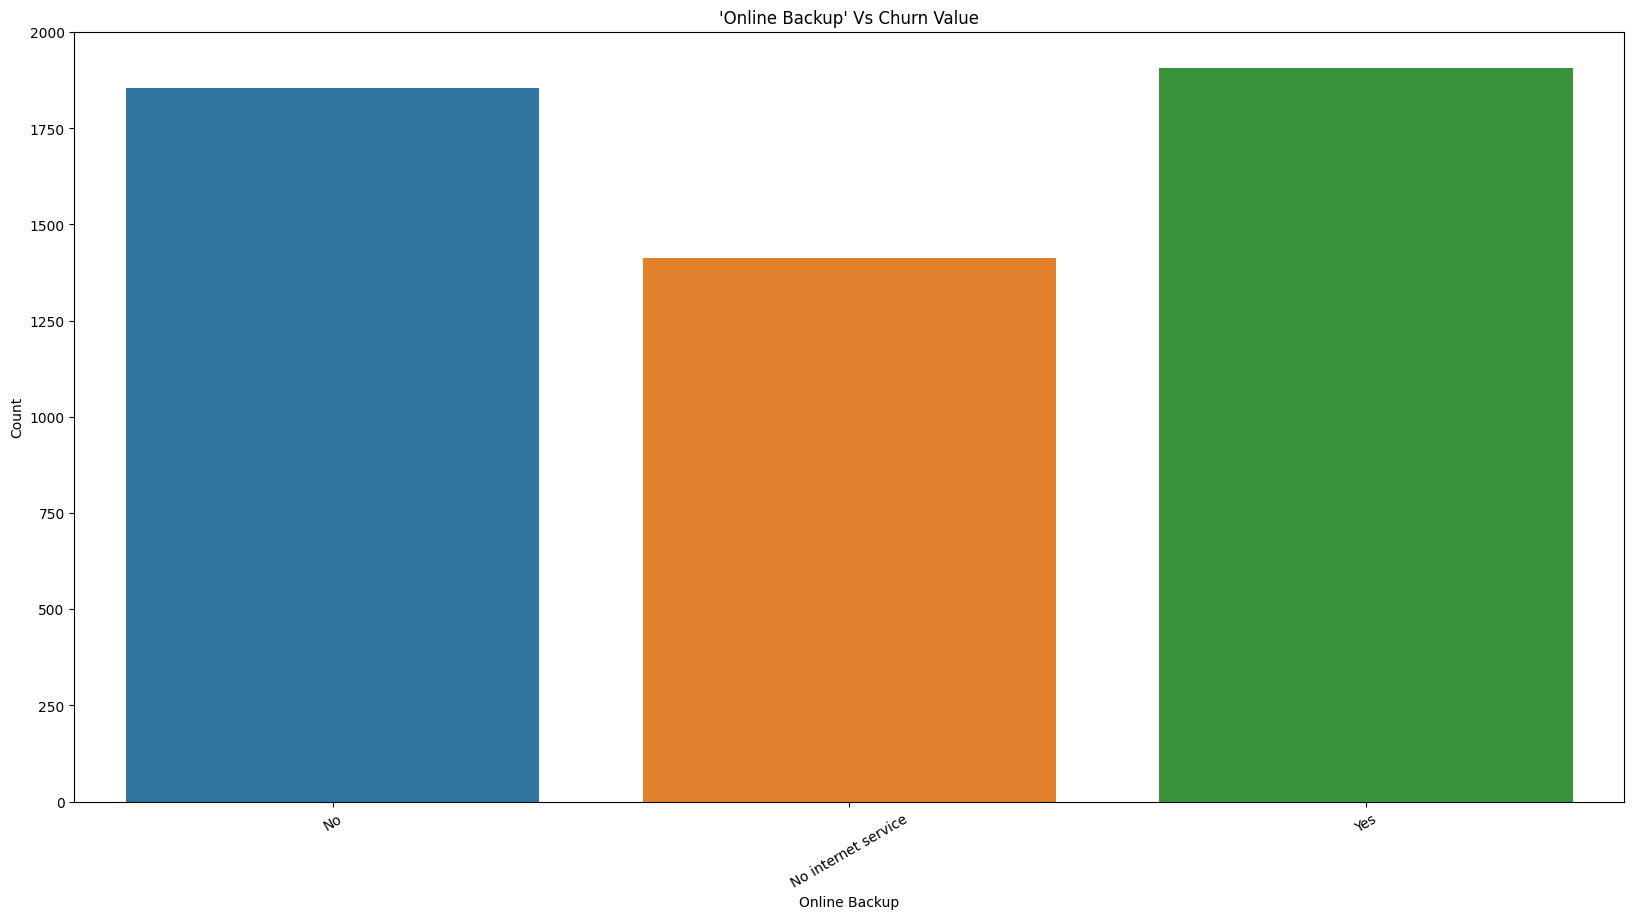

In [41]:


df3 =df[df['Churn Value']==0].groupby(['Online Backup']).agg({"Count":sum}).reset_index().sort_values(by='Online Backup')
plt.figure(figsize=(20,10))
plt.xticks(rotation=30)
sns.barplot(x='Online Backup',y='Count',data=df3)
plt.title("'Online Backup' Vs Churn Value")

/tmp/ipykernel_16/1852293912.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df3 =df[df['Churn Value']==0].groupby(['Device Protection']).agg({"Count":sum}).reset_index().sort_values(by='Device Protection')


Text(0.5, 1.0, 'Device Protection Ratio  on No-Churn ')

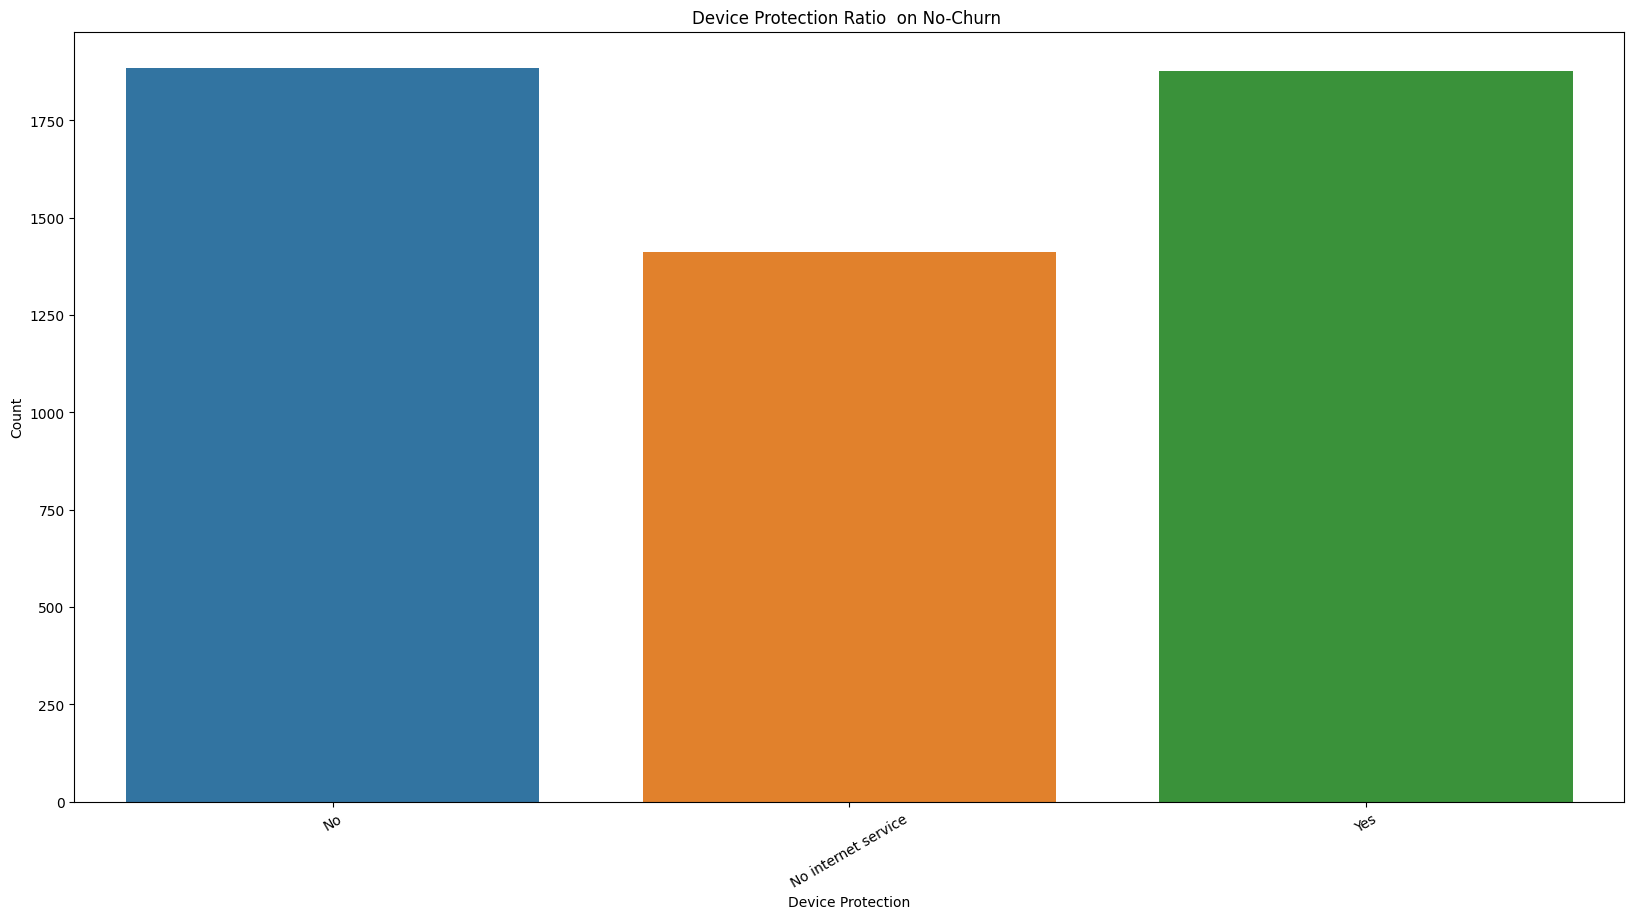

In [42]:


df3 =df[df['Churn Value']==0].groupby(['Device Protection']).agg({"Count":sum}).reset_index().sort_values(by='Device Protection')
plt.figure(figsize=(20,10))
plt.xticks(rotation=30)
sns.barplot(x='Device Protection',y='Count',data=df3)
plt.title("Device Protection Ratio  on No-Churn ")

/tmp/ipykernel_16/2069186918.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df3 =df[df['Churn Value']==0].groupby(['Contract']).agg({"Count":sum}).reset_index().sort_values(by='Contract')


<Axes: xlabel='Contract', ylabel='Count'>

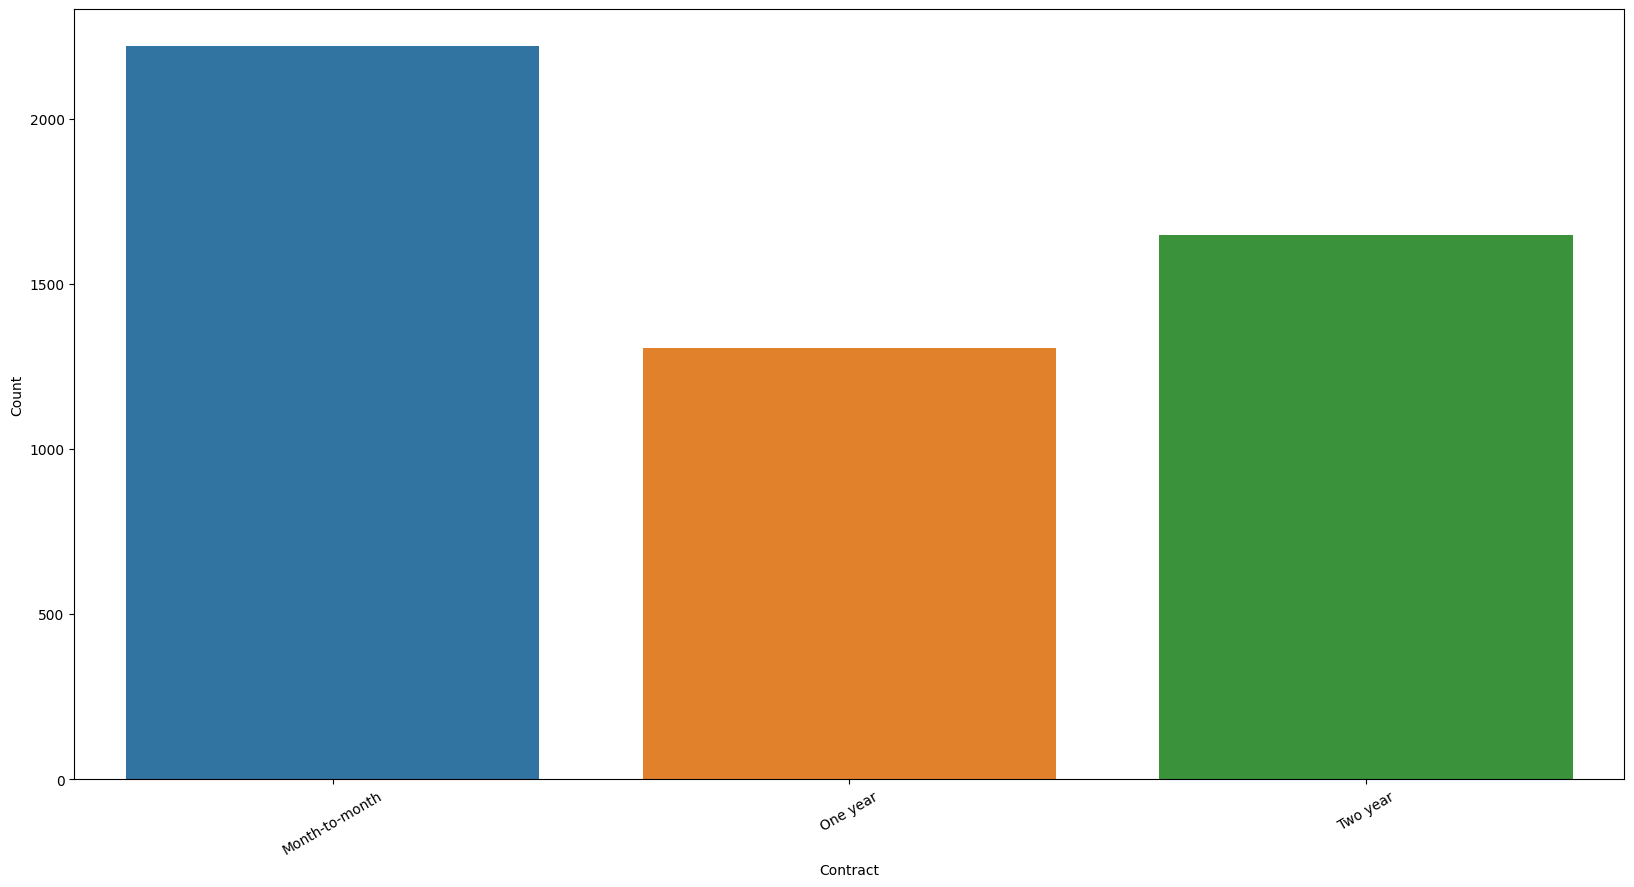

In [43]:


df3 =df[df['Churn Value']==0].groupby(['Contract']).agg({"Count":sum}).reset_index().sort_values(by='Contract')
plt.figure(figsize=(20,10))
plt.xticks(rotation=30)
sns.barplot(x='Contract',y='Count',data=df3)


/tmp/ipykernel_16/1424333383.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df3 =df[df['Churn Value']==0].groupby(['Paperless Billing','Churn Value']).agg({"Count":sum}).reset_index().sort_values(by='Paperless Billing')


<Axes: xlabel='Paperless Billing', ylabel='Count'>

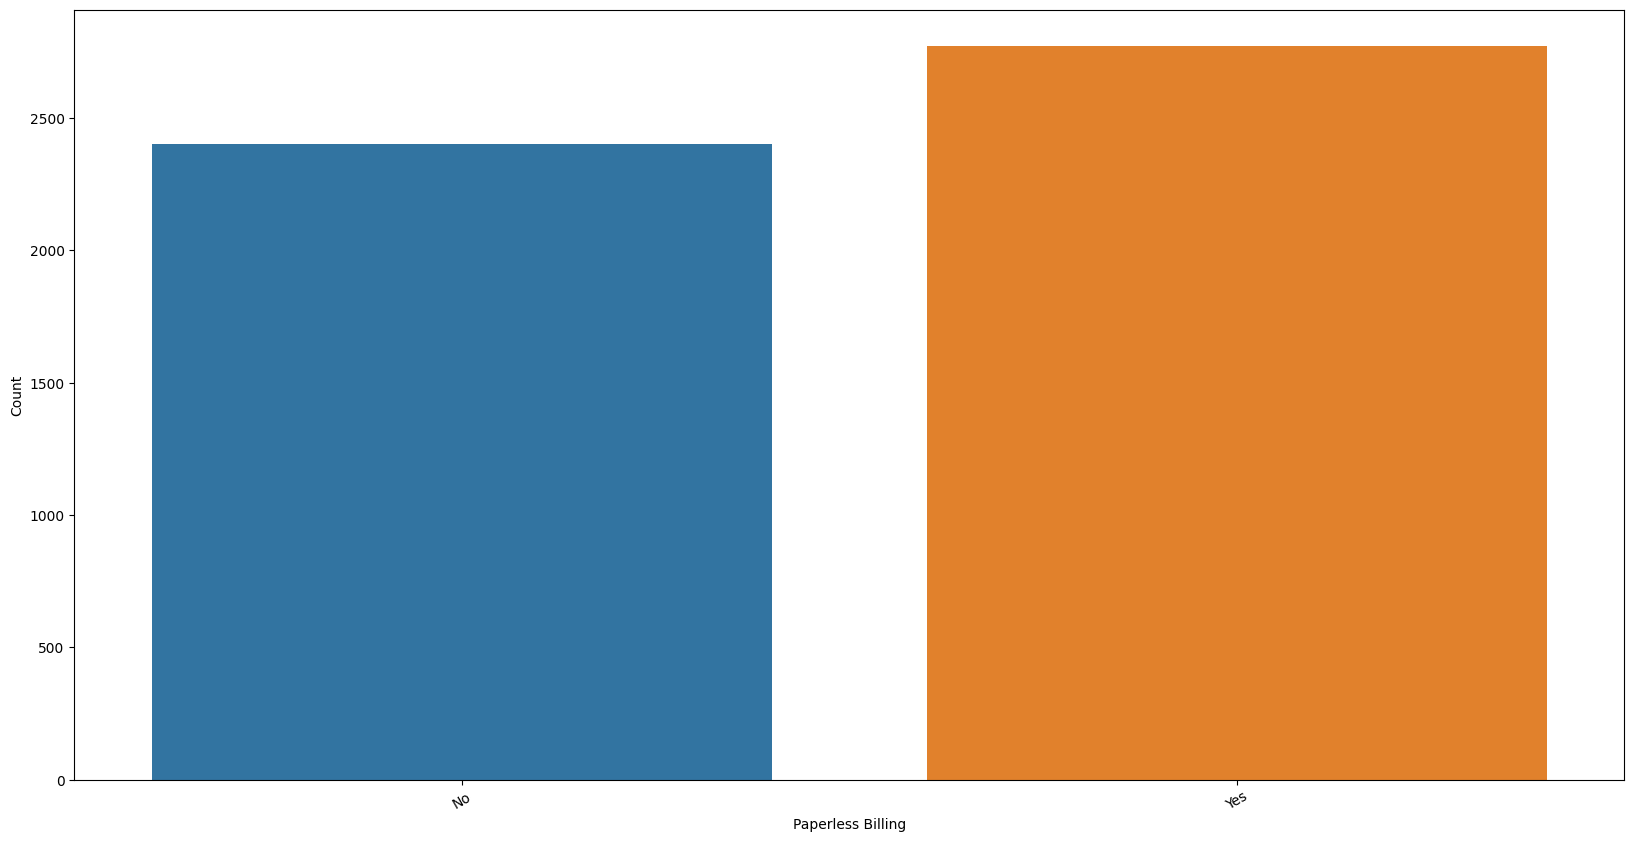

In [44]:


df3 =df[df['Churn Value']==0].groupby(['Paperless Billing','Churn Value']).agg({"Count":sum}).reset_index().sort_values(by='Paperless Billing')
plt.figure(figsize=(20,10))
plt.xticks(rotation=30)
sns.barplot(x='Paperless Billing',y='Count',data=df3)


/tmp/ipykernel_16/3711752848.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df3 =df[df['Churn Value']==0].groupby(['Payment Method']).agg({"Count":sum}).reset_index().sort_values(by='Payment Method')


<Axes: xlabel='Payment Method', ylabel='Count'>

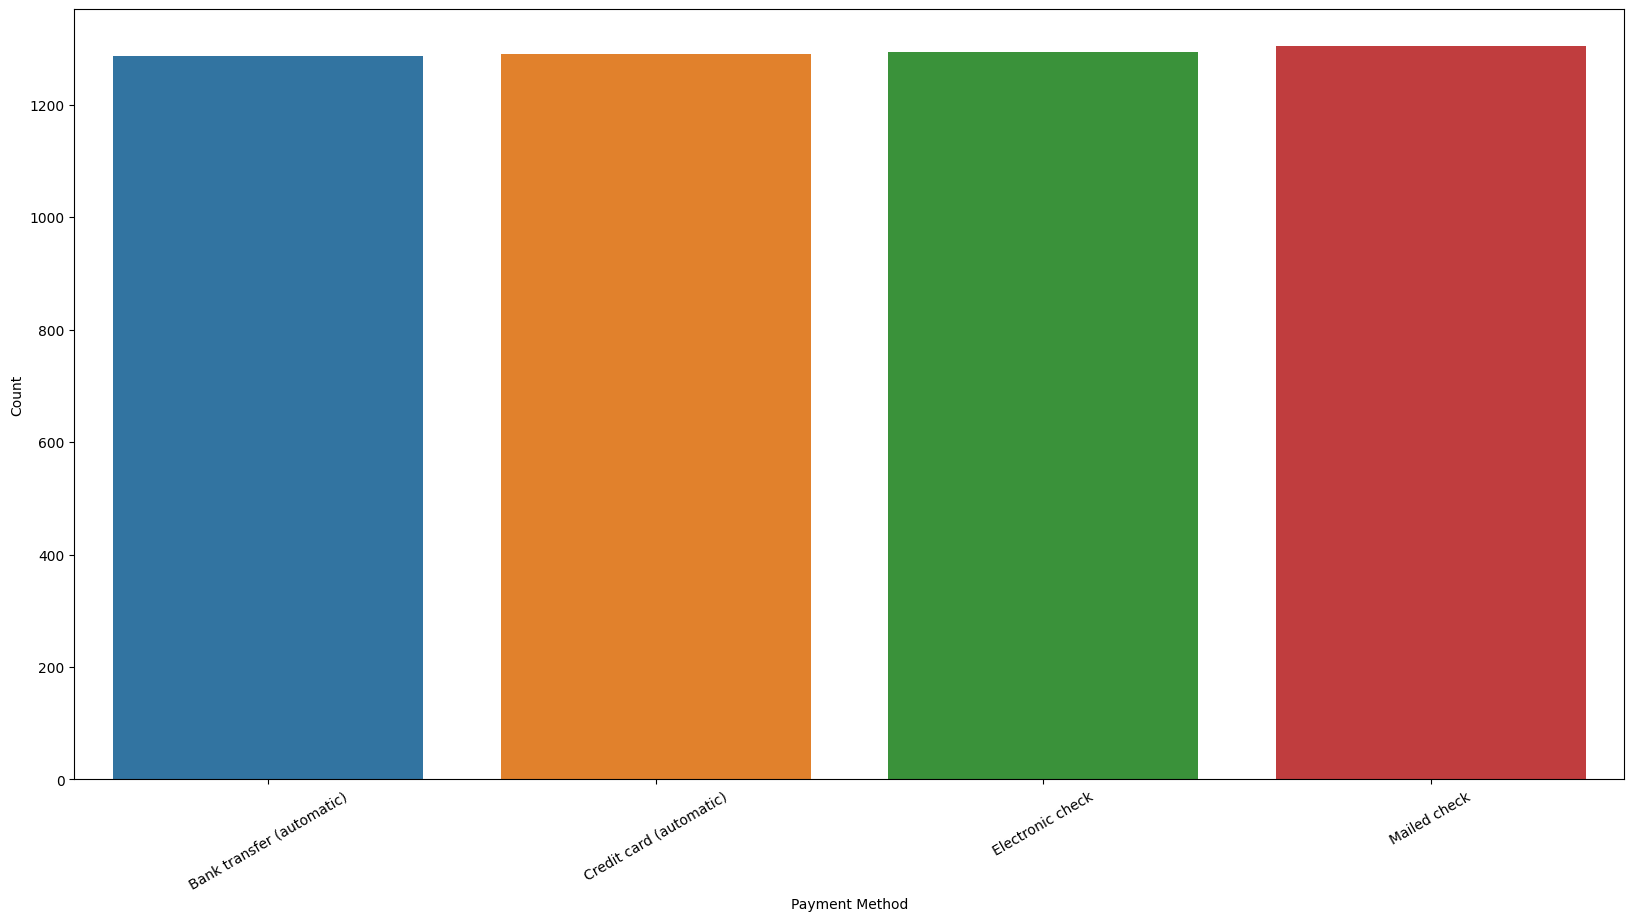

In [45]:



df3 =df[df['Churn Value']==0].groupby(['Payment Method']).agg({"Count":sum}).reset_index().sort_values(by='Payment Method')
plt.figure(figsize=(20,10))
plt.xticks(rotation=30)
sns.barplot(x='Payment Method',y='Count',data=df3)


## INFERENCE
* Most disenrollments happened from Los Angeles, San Diego, San Jose
* Males have slightly higher no-churn ratio than women, that may however be attributed to the greater population of men. This itself doesn't show any remarkable variance in data
* Senior citizens are more likely to get churned.
* Payment Type offering Electronic Checks has more churn numbers
* Monthly Charges impact churn ratio. People with higher monthly charges Churned but those paying lesser amount did not.
* contract Type of 2 years have lesser churn ratio. Month to Month contract has better churn numbers.
* Paper-less billing shows variance in churn counts. Those that offer paper-less billing has more churn numbers


## PREDICTIONS

We will predict if the user will churn or not based the independent features. Let us first stadardise & encode the values in data.

In [46]:
df.columns

Index(['Count', 'Country', 'State', 'City', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV'],
      dtype='object')

In [47]:
X=['Gender','Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Churn Value']
df2=df[X]


In [48]:
categorical= df2.select_dtypes(include=['object']).columns
numerical = df2.select_dtypes(include=['int64','float64']).columns

In [49]:
numerical

Index(['Tenure Months', 'Monthly Charges', 'Churn Value'], dtype='object')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


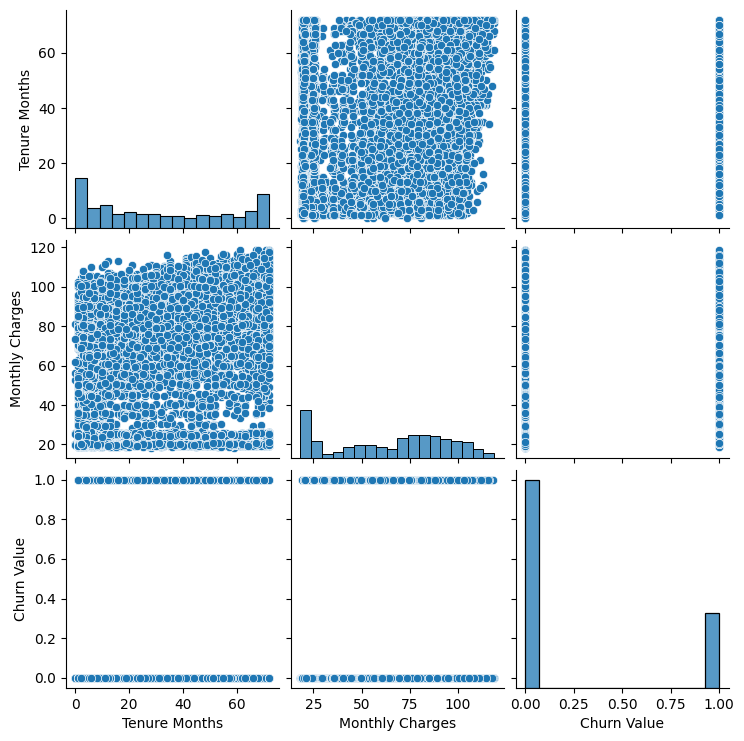

In [50]:
sns.pairplot(df[numerical])

In [51]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(
    [("encode",OneHotEncoder(),categorical),
    ("numerical",StandardScaler(),['Tenure Months', 'Monthly Charges'])],remainder="passthrough"
)



In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(df[X].drop(columns=['Churn Value']),df['Churn Value'],test_size=0.25)

In [53]:
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_transformed,Y_train)

RandomForestClassifier()

In [55]:
y_pred = rf.predict(X_test_transformed)

In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.8001135718341851

In [57]:
import xgboost as xg


In [58]:
xbc = xg.XGBClassifier()
xbc.fit(X_train_transformed,Y_train)
ypred = xbc.predict(X_test_transformed)
accuracy_score(ypred,Y_test)

0.7887563884156729

In [59]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1311
           1       0.63      0.52      0.57       450

    accuracy                           0.80      1761
   macro avg       0.74      0.71      0.72      1761
weighted avg       0.79      0.80      0.79      1761



## Let us try oversampling of minority class and then train the model

In [60]:
from imblearn.over_sampling import SMOTE

In [61]:
smote = SMOTE()
X_train_res, y_train_res = smote.fit_resample(X_train_transformed, Y_train)


In [62]:
rf.fit(X_train_res,y_train_res)
y_pred = rf.predict(X_test_transformed)

In [63]:
accuracy_score(Y_test,y_pred)

0.7967064168086314

In [64]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1311
           1       0.61      0.59      0.60       450

    accuracy                           0.80      1761
   macro avg       0.73      0.73      0.73      1761
weighted avg       0.79      0.80      0.80      1761



In [65]:
xbc = xg.XGBClassifier()
xbc.fit(X_train_res,y_train_res)
ypred = xbc.predict(X_test_transformed)
accuracy_score(ypred,Y_test)

0.7915956842703009

## Let us try downsampling our majority class and check if we can achive accuracy > 80%

In [66]:
from imblearn.under_sampling import RandomUnderSampler
undersample= RandomUnderSampler()
X_train_under, Y_train_under = undersample.fit_resample(X_train_transformed,Y_train)

In [67]:
rf.fit(X_train_under,Y_train_under)
y_pred = rf.predict(X_test_transformed)

In [68]:
accuracy_score(Y_test,y_pred)

0.7558205565019875

In [69]:
xbc = xg.XGBClassifier()
xbc.fit(X_train_under,Y_train_under)
ypred = xbc.predict(X_test_transformed)
accuracy_score(ypred,Y_test)

0.7473026689381034

### Since the dataset is highly imbalanced, we could achive close to 80% accuracy. However, this can be further enhanced by the usage of hyperparameter tuning or other boosting algorithms. 